#### SETUP

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from copy import deepcopy
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
os.chdir(r'C:\Users\hitan\OneDrive\Desktop\MiniProjects\ML_NMIMS Codes')

In [2]:
summary_mean = pd.read_csv(r'CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_AQI.csv')
summary_count = pd.read_csv(r'CPCB_Issues\AirPy_v2\new_data\summary\summary_count_AQI.csv')
sites_in_consideration = pd.read_csv(r'CPCB_Issues\AirPy_v2\final_site_list_new.csv')
summary_mean = deepcopy(summary_mean[summary_mean['site_id'].isin(sites_in_consideration['site_id'])].reset_index(drop=True))
summary_mean['pollutant'] = pd.merge(summary_mean, sites_in_consideration.groupby('site_id').agg({'pollutant':','.join}).reset_index(), on='site_id', how='inner')['pollutant'] 
summary_mean_mapping_2023 = pd.read_csv(r'CPCB_Issues\AirPy_v2\new_data\summary\2023_summary_mapping.csv').drop_duplicates()
summary_mean_mapping_2019 = pd.read_csv(r'CPCB_Issues\AirPy_v2\new_data\summary\2019_summary_mapping.csv').drop_duplicates()
site_master = pd.read_csv(r'CPCB_Issues\AirPy_v2\sites_master.csv')
sites_master = pd.read_csv(r'CPCB_Issues\AirPy_v2\sites_master.csv')
master_summary = pd.merge(summary_mean,summary_count,how='left',on=['site_id','year'],suffixes=(None,'_count'))

In [3]:
summary_count['Percent_Coverage'] = ((summary_count['NO2_CPCB']/summary_count['timestamp']))*100

In [ ]:
summary_count

,timestamp,state,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,...,year,site_id,site_name,prevalent_error,errors,C3,C5,C7,C8,Percent_Coverage
0,35040.0,0.0,33586.0,34317.0,31289.0,33483.0,33158.0,0.0,0.0,34549.0,...,2019,site_103,CRRI_Mathura_Road_Delhi_IMD,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,63.216324
1,35136.0,0.0,34569.0,34725.0,34502.0,34716.0,34651.0,0.0,0.0,34958.0,...,2020,site_103,CRRI_Mathura_Road_Delhi_IMD,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,80.401867
2,35040.0,0.0,33171.0,28152.0,27029.0,33983.0,33463.0,0.0,0.0,34432.0,...,2021,site_103,CRRI_Mathura_Road_Delhi_IMD,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,52.813927
3,35040.0,0.0,33908.0,33678.0,32817.0,32427.0,33793.0,0.0,0.0,34073.0,...,2022,site_103,CRRI_Mathura_Road_Delhi_IMD,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,45.536530
4,35040.0,0.0,32312.0,31777.0,30177.0,32195.0,32220.0,0.0,0.0,31484.0,...,2023,site_103,CRRI_Mathura_Road_Delhi_IMD,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,42.237443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,35040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2019,site_5423,Jawahar_Nagar_Puducherry_PPCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,35136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020,site_5423,Jawahar_Nagar_Puducherry_PPCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,35040.0,0.0,29811.0,30683.0,30456.0,32287.0,32386.0,32365.0,30413.0,31538.0,...,2021,site_5423,Jawahar_Nagar_Puducherry_PPCC,C1,"C1,C4",NaN,NaN,NaN,NaN,71.829338
1071,35040.0,0.0,31426.0,32001.0,32113.0,33338.0,33333.0,33260.0,29263.0,31463.0,...,2022,site_5423,Jawahar_Nagar_Puducherry_PPCC,C1,"C1,C4,C6",NaN,NaN,NaN,NaN,76.013128


In [ ]:
pd.merge(summary_count[['timestamp','site_id','site_name','year','NO2','NO2_CPCB','Percent_Coverage','prevalent_error']],summary_mean[['pollutant','site_id','year']], how='left', on=['site_id','year']).to_csv('count_summary_percentage.csv')

In [ ]:
summary_mean_map_plot = pd.read_csv(r'CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_map_plot.csv')

In [ ]:
pols = ['PM25', 'PM10', 'NO2', 'NO', 'Ozone']

In [ ]:
cols = summary_mean.columns.tolist()

In [ ]:
summary_mean[summary_mean['pollutant'].str.len() < 12]

,timestamp,state,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,...,year,site_id,site_name,prevalent_error,errors,C3,C5,C7,C8,pollutant
160,17519.5,NaN,55.995697,193.823389,27.675686,11.590189,33.020570,7.876410,27.501450,1.765967,...,2019,site_1408,Talcher_Coalfields_Talcher_OSPCB,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,Ozone
161,17567.5,NaN,49.836112,108.627936,25.045619,24.490145,36.720626,10.967199,25.088320,1.513472,...,2020,site_1408,Talcher_Coalfields_Talcher_OSPCB,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,Ozone
162,17519.5,NaN,41.624732,84.958952,27.677986,29.662044,42.109154,23.711470,17.919408,1.402872,...,2021,site_1408,Talcher_Coalfields_Talcher_OSPCB,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,Ozone
163,17519.5,NaN,42.779331,84.921597,17.111356,27.133583,19.096300,23.502172,32.203273,1.179618,...,2022,site_1408,Talcher_Coalfields_Talcher_OSPCB,C2,"C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,Ozone
164,17519.5,NaN,62.787945,115.101589,27.686694,34.173321,36.624655,24.936544,29.028978,1.244516,...,2023,site_1408,Talcher_Coalfields_Talcher_OSPCB,C2,"C2,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,Ozone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,17519.5,NaN,63.245408,106.814705,19.202961,37.865632,55.626557,NaN,NaN,1.532029,...,2022,site_5404,Mhada_Colony_Pune_IITM,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"Ozone,NO2"
1059,17519.5,NaN,52.315493,87.662813,19.611402,27.587730,47.156446,NaN,NaN,1.198118,...,2023,site_5404,Mhada_Colony_Pune_IITM,C2,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"Ozone,NO2"
1065,17519.5,NaN,29.633752,61.279058,8.933538,28.701337,37.147374,44.264439,21.451912,0.760582,...,2021,site_5421,Kadri_Mangalore_KSPCB,C2,"C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"Ozone,NO2"
1066,17519.5,NaN,22.076435,62.078084,35.328640,28.652708,63.725951,37.037665,8.093532,0.954685,...,2022,site_5421,Kadri_Mangalore_KSPCB,C2,"C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"Ozone,NO2"


In [ ]:
summary_mean[summary_mean['site_id'] == 'site_5423']

,timestamp,state,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,...,year,site_id,site_name,prevalent_error,errors,C3,C5,C7,C8,pollutant
1068,17519.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019,site_5423,Jawahar_Nagar_Puducherry_PPCC,NaN,NaN,NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
1069,17567.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020,site_5423,Jawahar_Nagar_Puducherry_PPCC,NaN,NaN,NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
1070,17519.5,NaN,20.904096,43.553922,2.232706,11.486363,7.827759,8.800420,8.799872,0.530921,...,2021,site_5423,Jawahar_Nagar_Puducherry_PPCC,C1,"C1,C4",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
1071,17519.5,NaN,25.434799,52.056467,2.321842,11.002988,7.690184,9.086578,12.814797,0.559393,...,2022,site_5423,Jawahar_Nagar_Puducherry_PPCC,C1,"C1,C4,C6",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
1072,17519.5,NaN,25.002744,52.650156,2.610839,10.750275,7.824315,9.233723,8.201797,0.703191,...,2023,site_5423,Jawahar_Nagar_Puducherry_PPCC,C1,"C1,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"


### Figure 2

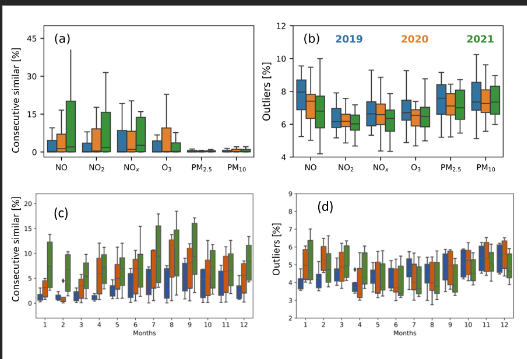 <br/> Reproduce this plot with new data

C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1332272156.py:29: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1332272156.py:70: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1332272156.py:122: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1332272156.py:163: FutureW

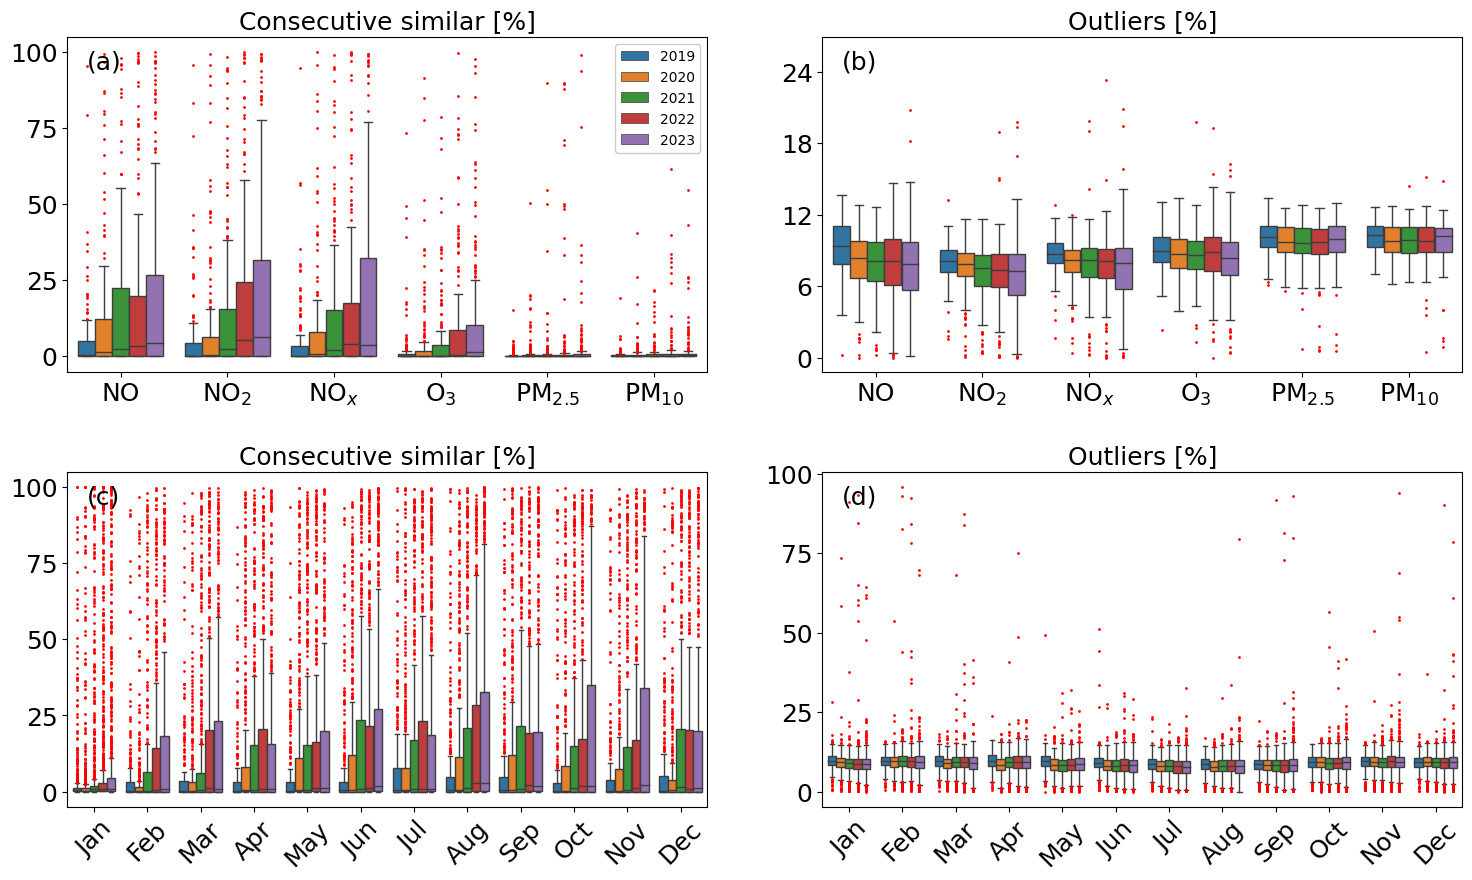

In [46]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
fig, ax = plt.subplots(2, 2, figsize=(18,10))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

# ========================= Similars by Pollutants =========================
count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count.csv")
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100

per_df = t


melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=['NO_consecutives', 'NO2_consecutives',
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
# print(melt_df_1)

d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)
# print(melt_df_1[melt_df_1['site_id'] == 'site_5404'])
    

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )


ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_title("Consecutive similar [%]", fontsize=18)
ax1.set_xlabel("Pollutants", fontsize=18)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# raise Exception


# ========================= Outliers by Pollutants =========================

melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax2, 
            x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = True,
            linewidth=1,
            flierprops=flierprops)

# ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_title("Outliers [%]", fontsize=18)
ax2.set_xlabel("Pollutants", fontsize=18)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))



# ========================= Similars by Month =========================
count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\monthly_condensed_new.csv")
t = count_var.copy(deep=True)


lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100
# Now, _consecutives and _outliers are in percentage of data missing/removed.

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
# print(melt_df_1)
d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax3, 
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = True,
            linewidth=1,
            flierprops=flierprops )


# ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax3.set_title("Consecutive similar [%]", fontsize=18)
ax3.set_xlabel("Month", fontsize=18)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= Outliers by Month =========================

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax4,
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = True,
            linewidth=1,
            flierprops=flierprops)

# ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax4.set_title("Outliers [%]", fontsize=18)
ax4.set_xlabel("Month", fontsize=18)
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= PLOT ALL =========================


plt.subplots_adjust(wspace=0.18,
                    hspace=0.3)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)
ax4.tick_params(labelsize=18)

plt.text(.03, .96, '(a)', ha='left', va='top', transform=ax1.transAxes,  backgroundcolor = 'none', fontsize=18)
ax2.set_ylim([ax2.get_ylim()[0], ax2.get_ylim()[1] * 1.1])
plt.text(.03, .96, '(b)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(c)', ha='left', va='top', transform=ax3.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(d)', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none', fontsize=18)

fig.savefig(r'CPCB_Issues\AirPy_v2\new_data\summary\final_plots\figure_2.png', dpi=400, bbox_inches="tight")

plt.show()

C:\Users\hitan\AppData\Local\Temp\ipykernel_34984\1968172856.py:29: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_34984\1968172856.py:70: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_34984\1968172856.py:122: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_34984\1968172856.py:163: Fut

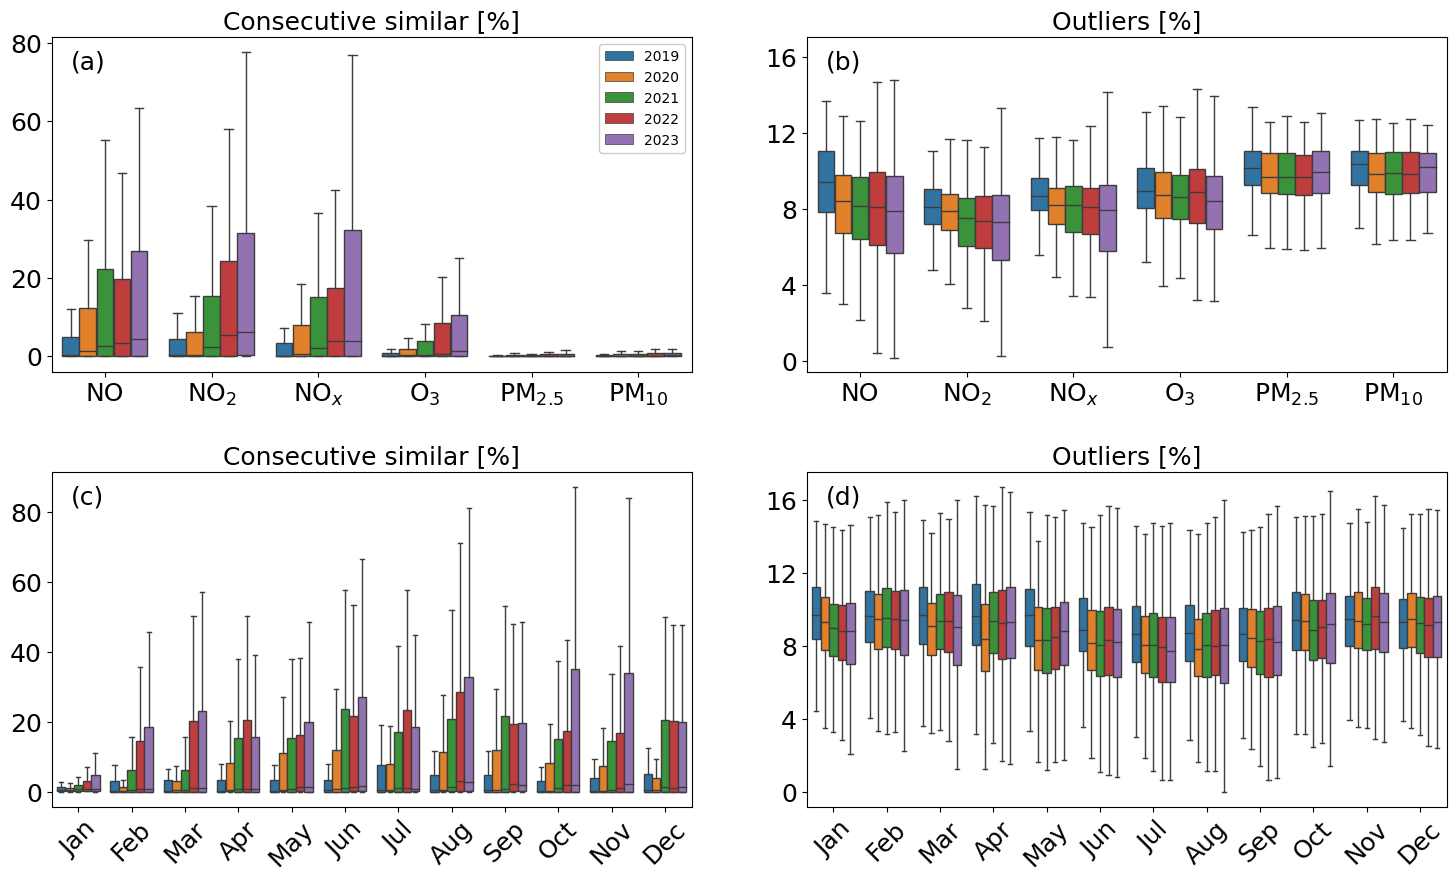

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
fig, ax = plt.subplots(2, 2, figsize=(18,10))
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

# ========================= Similars by Pollutants =========================
count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count.csv")
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100

per_df = t


melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=['NO_consecutives', 'NO2_consecutives',
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
# print(melt_df_1)

d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)
# print(melt_df_1[melt_df_1['site_id'] == 'site_5404'])
    

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = False,linewidth=1,flierprops=flierprops )


ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_title("Consecutive similar [%]", fontsize=18)
ax1.set_xlabel("Pollutants", fontsize=18)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# raise Exception


# ========================= Outliers by Pollutants =========================

melt_df_1 = per_df.melt(id_vars=['year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax2, 
            x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)

# ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_title("Outliers [%]", fontsize=18)
ax2.set_xlabel("Pollutants", fontsize=18)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))



# ========================= Similars by Month =========================
count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\monthly_condensed_new.csv")
t = count_var.copy(deep=True)


lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100
# Now, _consecutives and _outliers are in percentage of data missing/removed.

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
# print(melt_df_1)
d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)

flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax3, 
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops )


# ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax3.set_title("Consecutive similar [%]", fontsize=18)
ax3.set_xlabel("Month", fontsize=18)
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= Outliers by Month =========================

melt_df_1 = t.melt(id_vars=['month','year','site_id'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])
d = []
for row in melt_df_1.to_dict(orient='records'):
    if (row['Pollutant'] == 'NO' or row['Pollutant'] == 'NO2' or row['Pollutant'] == 'NOx') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('NO2').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'Ozone') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('Ozone').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM25') and not (summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM25').iloc[0]):
        row['value'] = np.nan
    if (row['Pollutant'] == 'PM10') and (~summary_mean[summary_mean['site_id'] == row['site_id']]['pollutant'].str.contains('PM10').iloc[0]):
        row['value'] = np.nan
    d.append(row)
# print(d)
melt_df_1 = pd.DataFrame(d)


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='None')

sns.boxplot(ax = ax4,
            x = melt_df_1['month'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)

# ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax4.set_title("Outliers [%]", fontsize=18)
ax4.set_xlabel("Month", fontsize=18)
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))


# ========================= PLOT ALL =========================


plt.subplots_adjust(wspace=0.18,
                    hspace=0.3)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")
ax2.legend().remove()
ax3.legend().remove()
ax4.legend().remove()

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)
ax4.tick_params(labelsize=18)

plt.text(.03, .96, '(a)', ha='left', va='top', transform=ax1.transAxes,  backgroundcolor = 'none', fontsize=18)
ax2.set_ylim([ax2.get_ylim()[0], ax2.get_ylim()[1] * 1.1])
plt.text(.03, .96, '(b)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(c)', ha='left', va='top', transform=ax3.transAxes, backgroundcolor = 'none', fontsize=18)
plt.text(.03, .96, '(d)', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none', fontsize=18)

fig.savefig(r'CPCB_Issues\AirPy_v2\new_data\summary\final_plots\figure_2_without_fliers.png', dpi=400, bbox_inches="tight")

plt.show()

### Plot 2

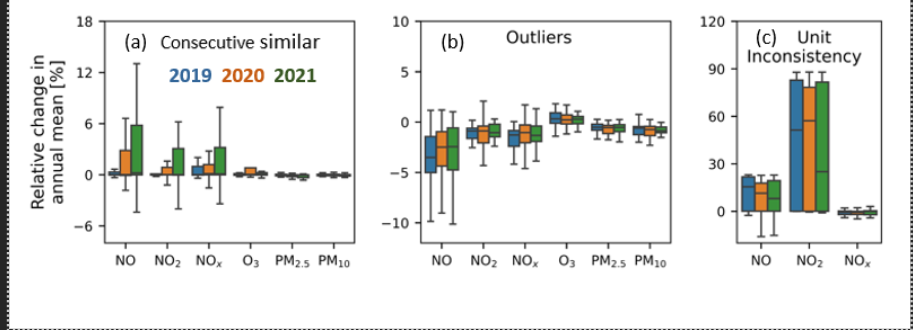

Reproduce this plot

In [9]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1137596831.py:39: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1137596831.py:58: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1137596831.py:91: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),


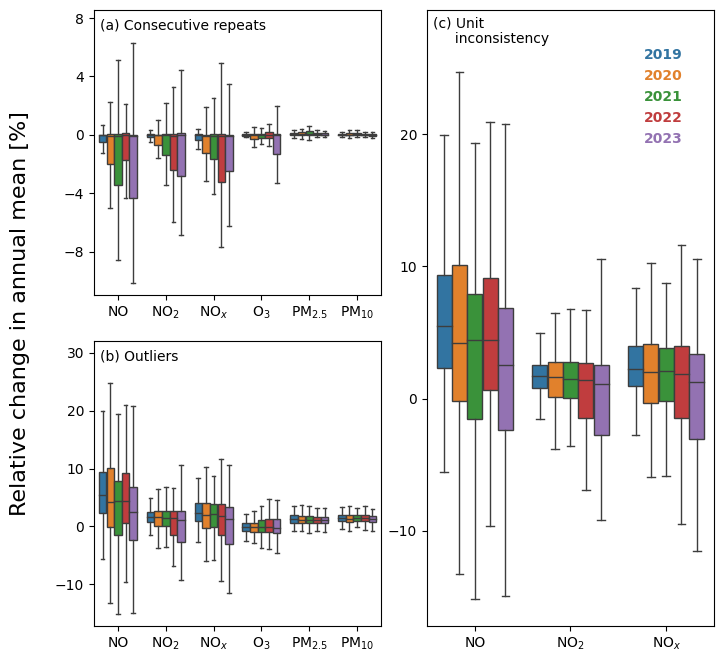

In [109]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(nrows=2, ncols=2)

ax3 = fig.add_subplot(gs[0:1, 0:1])
ax4 = fig.add_subplot(gs[1:2, 0:1])
ax5 = fig.add_subplot(gs[:, 1:2])


plt.subplots_adjust(wspace=0.16,
                    hspace=0.16)


count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
t = count_var
df = count_var


lst = ['NO', 'NO2', 'NOx', 'Ozone', 'PM25', 'PM10']
per_df = t
for name in lst:
    # t[name + '_consecutives'] = (t[name] - t[name+'_clean'])*100/t[name]
    # t[name + '_outliers'] = (t[name+'_outliers'] - t[name+'_clean'])*100/t[name+'_clean']
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)  
    t[name + '_consecutives'] = (t[name] - t[name + '_consecutives'])*100/t[name]
    t[name + '_outliers'] = (t[name] - t[name+'_outliers'])*100/t[name]

    if name[:2] == 'NO':
        per_df[name + '_Unit inconsistency'] =  (df[name]-df[name + '_CPCB'])/df[name + '_outliers']*100

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])

flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.boxplot(ax = ax3, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = False,linewidth=1,flierprops=flierprops )

ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
# ax3.set_ylabel("Relative change in " + "\n"+"annual mean [%]", fontsize=12)
ax3.set_xlabel("Pollutants")
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')
sns.boxplot(ax = ax4, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)


ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax4.set_ylabel("Outliers [%]")
ax4.set_xlabel("Pollutants")
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))




from matplotlib.patches import Rectangle
ax3.get_legend().remove()
ax4.get_legend().remove()


per_df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
for name in ['NO', 'NO2', 'NOx']:
    per_df[name + '_Unit inconsistency'] =  (per_df[name] - per_df[name + '_outliers'])*100/per_df[name]
melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_Unit inconsistency', 'NO2_Unit inconsistency', 
                                                            'NOx_Unit inconsistency'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])

sns.boxplot(ax = ax5, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],
            showfliers = False,
            linewidth=1,
            flierprops=flierprops)


ax5.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$'])
ax5.set_ylabel("Outliers [%]")
ax5.set_xlabel("Pollutants")
ax5.yaxis.set_major_locator(plt.MaxNLocator(5))



custom_lines = [Line2D([0], [0], color='#3274a1', lw=0),
                Line2D([0], [0], color='#e1812c', lw=0),
                Line2D([0], [0], color='#3a923a', lw=0),
                Line2D([0], [0], color='#c03d3e', lw=0),
                Line2D([0], [0], color='#9372b2', lw=0)]
legend_properties = {'weight':'bold'}
legend = ax5.legend(custom_lines, 
                    ['2019', '2020', '2021', '2022','2023'], 
                    labelcolor='linecolor',
                    loc=(0.6,0.77),
                    fontsize=10,
                    prop=legend_properties, 
                    ncols=1,
                    columnspacing=0)
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')

# ax5.
# ax5.get_legend().remove()
ax3.set_ylabel("")
ax4.set_ylabel("")
ax5.set_ylabel("")

ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")
fig.supylabel('Relative change in annual mean [%]', fontsize=16)

ax3.set_ylim([ax3.get_ylim()[0], ax3.get_ylim()[1] * 1.2])
ax4.set_ylim([ax4.get_ylim()[0], ax4.get_ylim()[1] * 1.2])
ax5.set_ylim([ax5.get_ylim()[0], ax5.get_ylim()[1] * 1.1])

plt.text(0.02, .97, '(a) Consecutive repeats', ha='left', va='top', transform=ax3.transAxes,  backgroundcolor = 'none')
plt.text(0.02, .97, '(b) Outliers', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none')
plt.text(0.02, .99, '(c) Unit \n     inconsistency', ha='left', va='top',transform=ax5.transAxes, backgroundcolor = 'none')

plt.savefig(r'CPCB_Issues\AirPy_v2\new_data\summary\final_plots\figure_5.png', dpi=400, bbox_inches="tight")

plt.show()

### PLOT 3

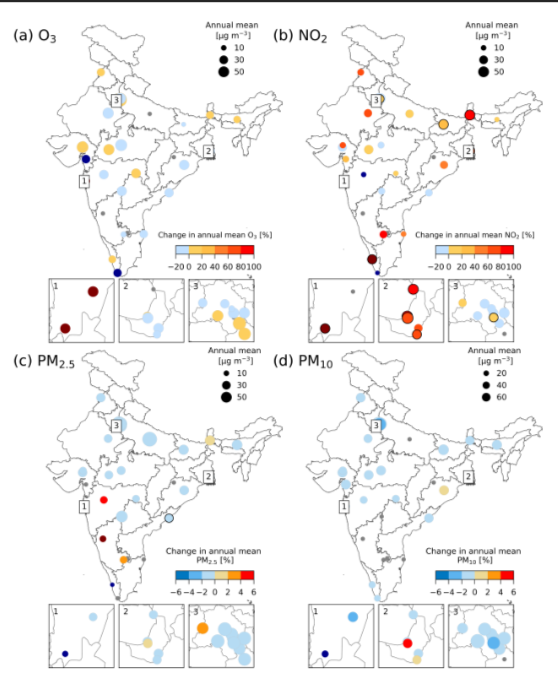 <br/>
Reproduce this plot

In [5]:
import geopandas as gpd
gpd.read_file('CPCB_Issues\AirPy_v2\india_state_original.geojson')

,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((95.23392 26.68246, 95.23282 26.70579..."
1,Assam,"POLYGON ((95.19465 27.03132, 95.15008 26.99934..."
2,Chandigarh,"POLYGON ((76.83806 30.75487, 76.83301 30.73887..."
3,Karnataka,"POLYGON ((77.55144 18.29191, 77.57026 18.29252..."
4,Manipur,"POLYGON ((94.67545 25.44561, 94.67293 25.42398..."
5,Meghalaya,"POLYGON ((92.42522 25.02966, 92.40163 25.03363..."
6,Mizoram,"POLYGON ((93.00870 24.41178, 93.02462 24.39255..."
7,Nagaland,"POLYGON ((95.19465 27.03132, 95.19717 27.00183..."
8,Punjab,"POLYGON ((76.77673 30.90429, 76.78433 30.87791..."
9,Rajasthan,"POLYGON ((74.52716 29.94279, 74.51002 29.90819..."


PLOTTING FOR:  2020 NO2
32
0    19
1    13
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 PM25
32
0    32
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 PM10
32
0    31
1     1
Name: compliance_change, dtype: int64
PLOTTING FOR:  2020 Ozone
32
0    31
1     1
Name: compliance_change, dtype: int64


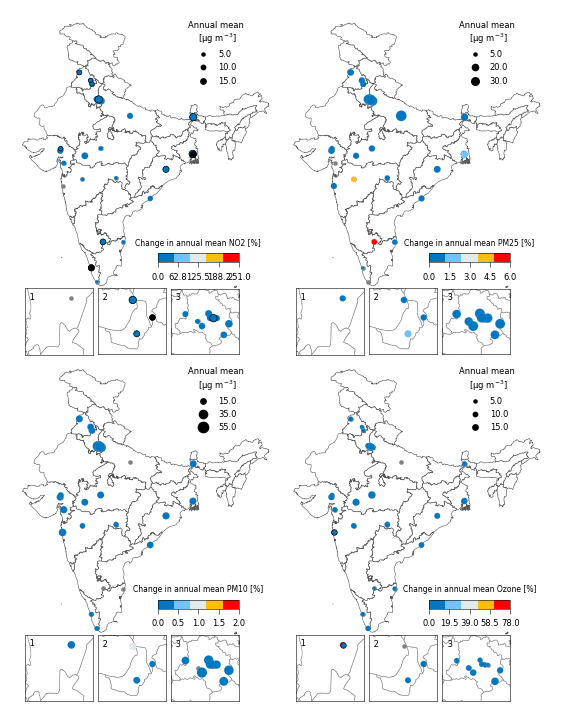

In [3]:
from plot_maps import create_map_plots
# years = [2019,2020,2021,2022,2023]
years = [2020]
for year in years:
    df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
    count_summary = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count.csv")
    sites_to_plot = pd.read_csv(r"C:\Users\hitan\OneDrive\Desktop\MiniProjects\ML_NMIMS Codes\CPCB_Issues\original_40_sites.csv")

    create_map_plots(df, count_summary, year, ['NO2', 'PM25', 'PM10', 'Ozone'], site_list=sites_to_plot)

In [ ]:
from plot_maps import create_map_plots
# years = [2019,2020,2021,2022,2023]
years = [2020]
for year in years:
    df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
    count_summary = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count.csv")

    sites_to_plot = pd.read_csv(r"CPCB_Issues\AirPy_v2\final_site_list.csv")

    df = df[df['site_id'].isin(sites_to_plot['site_id'])]
    create_map_plots(df, count_summary, year, ['PM25', 'PM10', 'NO2', 'Ozone'])

### Figure 1

C:\Users\hitan\AppData\Local\Temp\ipykernel_26620\931508060.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['dates'].dt.time
C:\Users\hitan\AppData\Local\Temp\ipykernel_26620\931508060.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['m'] = (np.asarray(df['dates'].dt.minute))
C:\Users\hitan\AppData\Local\Temp\ipykernel_26620\931508060.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

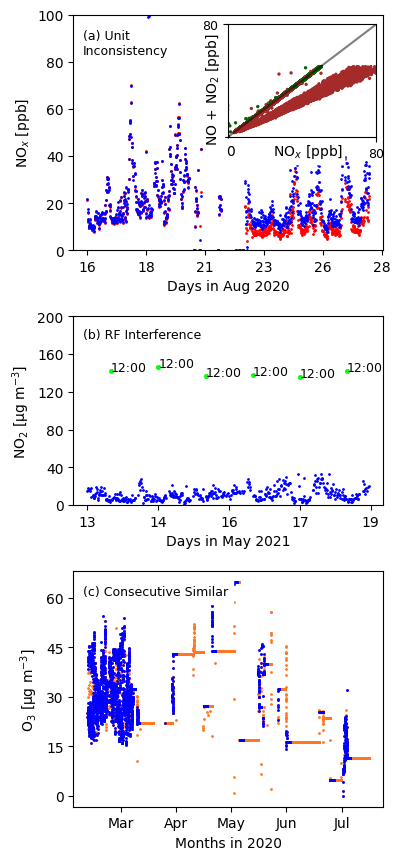

In [40]:
inset_label = 10
inset_ticks = 9

fig, ax = plt.subplots(3,1, sharey=False,sharex=False,figsize=(4,9),gridspec_kw={'height_ratios': [2.5, 2, 2.5]})


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_256_Golden_Temple_Amritsar_PPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M:%S")
local_df = local_df[(local_df['dates'].dt.month <8) & (local_df['dates'].dt.month >= 3)]    
ax[2].scatter(local_df['dates'],local_df['Ozone'], color = '#FF7722',edgecolors='#FF7722', s =1)
ax[2].scatter(local_df['dates'],local_df['Ozone_outliers'], color = 'blue', s=1)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax[2].set_xlabel("Months in 2020")
# ax[2].set_ylim([0,70])
ax[2].set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
for axis in ax:
    axis.xaxis.set_major_locator(plt.MaxNLocator(4))
    axis.yaxis.set_major_locator(plt.MaxNLocator(4))


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_252_Plammoodu_Thiruvananthapuram_Kerala_PCB_2021.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")
df = local_df
df = local_df[(local_df['dates'].dt.month == 5)&(local_df['dates'].dt.day >12)&(local_df['dates'].dt.day <19)]
df['time'] = df['dates'].dt.time
df['m'] = (np.asarray(df['dates'].dt.minute))
df['h'] = (np.asarray(df['dates'].dt.hour))
df[["m", "h"]] = df[["m", "h"]].astype(str) 
df['h_m'] = df['h'] +":"+ df['m'].replace("0","00") 
df['h_m']
df_1 = df[(df['NO2']>100)]
df_1[['dates','NO2','h_m']].apply(lambda row: ax[1].text(*row,fontsize=inset_ticks),axis=1);
ax[1].scatter(df['dates'],df['NO2_CPCB'], color = 'b', s= 1)
ax[1].scatter(df_1['dates'],df_1['NO2'], color = '#08ff08', s = 10, edgecolor = '#08ff08',linewidth= 0.5)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax[1].set_xlabel("Days in May 2021")
# ax[1].set_ylim([0,200])
ax[1].set_ylabel("NO" + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_119_Sirifort_Delhi_CPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")
local_df = local_df[(local_df['dates'].dt.month == 8) & (local_df['dates'].dt.day >15) & (local_df['dates'].dt.day <28)]
ax[0].scatter(local_df['dates'],(local_df['NO2']/1.88 + local_df['NO']/1.23) , color = 'r', s =1)
ax[0].scatter(local_df['dates'],(local_df['NOx']) , color = 'b', s =1)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax[0].set_xlabel("Days in Aug 2020")
ax[0].set_ylabel("NO" + '$_{x}$'+ ' [ppb]')
ax[0].set_ylim([0,100])



for axis in ax:
#     axis.xaxis.set_tick_params(labelsize=12)
#     axis.yaxis.set_tick_params(labelsize=12)
    axis.xaxis.set_major_locator(plt.MaxNLocator(6))
    axis.yaxis.set_major_locator(plt.MaxNLocator(5))
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

spacing = 0.0
fig.subplots_adjust(bottom=spacing, hspace=0.3)
# plt.text(.03, .94, '(a) Unit \nInconsistency', ha='left', va='top', transform=ax[0].transAxes, size= 9, backgroundcolor = 'white', color = '#ff2f2f')
# plt.text(.03, .94, '(b) RF Interference', ha='left', va='top',transform=ax[1].transAxes, size= 9,backgroundcolor = 'white', color = '#21c721')
# plt.text(.03, .94, '(c) Consecutive Repeats', ha='left', va='top', transform=ax[2].transAxes, size= 9,backgroundcolor = 'white', color = '#ff7722')

plt.text(.03, .94, '(a) Unit \nInconsistency', ha='left', va='top', transform=ax[0].transAxes, size= 9, backgroundcolor = 'white', color = 'black')
plt.text(.03, .94, '(b) RF Interference', ha='left', va='top',transform=ax[1].transAxes, size= 9,backgroundcolor = 'white', color = 'black')
plt.text(.03, .94, '(c) Consecutive Similar', ha='left', va='top', transform=ax[2].transAxes, size= 9,backgroundcolor = 'white', color = 'black')

cmap = plt.cm.coolwarm
from matplotlib.lines import Line2D
# legend = ax[2].legend([Line2D([0], [0], color='#ff7722', lw=0),
#               Line2D([0], [0], color='#21c721', lw=0),
#               Line2D([0], [0], color='#ff2f2f', lw=0)], 
#              ['Consecutive repeats ', 
#               '       RF interference', 
#               '    Inconsistent units'],facecolor = 'white',labelcolor='linecolor',
#              loc='upper right',framealpha =1, fancybox = False)
# frame = legend.get_frame()
# frame.set_color('white')
# frame.set_facecolor('white')
# frame.set_edgecolor('white')
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(ax[0],
                      height="60%", # set height
                      width="60%",loc='center right',
                   bbox_to_anchor=(0.20,0.32,0.8,0.8), bbox_transform=ax[0].transAxes)
inset_ax.plot([0,80],[0,80], color='black',alpha=0.5, linewidth = 1.5)


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_119_Sirifort_Delhi_CPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")
t = inset_ax.text(-12.5,22,'         ' +"   " + '  ', size = inset_label, rotation=90, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10,"                         ", size = inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10,"                         ", size = inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))


local_df = local_df[(local_df['NO2']/1.88 + local_df['NO']/1.23) < 50]  
# 
local_df['score'] = local_df['error'].apply(lambda x: 'darkgreen' if (x == 'C1' or x == 'UNIDENTIFIABLE')  else 'brown')
inset_ax.scatter((local_df['NOx']), (local_df['NO2']/1.88 + local_df['NO']/1.23), color=local_df['score'], s = 2,alpha=1)

inset_ax.xaxis.set_tick_params(labelsize=inset_ticks)
inset_ax.yaxis.set_tick_params(labelsize=inset_ticks)
inset_ax.xaxis.set_major_locator(plt.MaxNLocator(1))
inset_ax.yaxis.set_major_locator(plt.MaxNLocator(1))


t = inset_ax.text(-12.5,22,'        NO +' +" NO" + '$_{2}$ [ppb]', size = inset_label, rotation=90, va='center')
t = inset_ax.text(1, -10,"          NO" + '$_{x}$ [ppb]', size = inset_label, va='center')
t = inset_ax.text(-1, -10,'0', size = inset_label, va='center')



# ax[2].set_ylim([0,80])
inset_ax.set_xlim([0,80])
inset_ax.set_ylim([0,80])
ax[1].set_ylim([0,200])

inset_ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

inset_ax.xaxis.get_major_ticks()[0].label1.set_visible(False)

fig.savefig(r'CPCB_Issues\AirPy_v2\new_data\summary\final_plots\figure_1', dpi=300, bbox_inches="tight")

### Figure 4

In [69]:
summary_mean[summary_mean['errors'].str.contains('C1') & 
             summary_mean['pollutant'].str.contains('NO2') & 
            ((summary_count['C2'] - summary_count['NO2']) < 10) &
             (summary_mean['prevalent_error'].str.contains('C1') | summary_mean['prevalent_error'].str.contains('C1')) &
             (((summary_mean['NO2_CPCB'] - summary_mean['NO2_outliers']).abs()/summary_mean['NO2_outliers']) >= 0.2) &
            ((((summary_count['NO2_outliers']-summary_count['NO2_CPCB'])/summary_count['NO2_outliers']) - 0.5) < 0.3)
             ]

,timestamp,state,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,...,year,site_id,site_name,prevalent_error,errors,C3,C5,C7,C8,pollutant
58,17519.5,NaN,97.354905,213.669725,20.834308,31.115275,41.355726,23.274799,16.414102,1.020604,...,2022,site_118,DTU_Delhi_CPCB,C1,"C1,C2,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
282,17519.5,NaN,90.897674,NaN,28.634666,39.359772,42.676289,NaN,11.598338,1.022570,...,2021,site_146,Vikas_Sadan_Gurugram_HSPCB,C1,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,Ozone,NO2"
324,17519.5,NaN,39.889022,78.494791,7.073534,24.402478,17.421593,19.571225,5.642038,0.844309,...,2023,site_1553,Bapuji_Nagar_Bengaluru_KSPCB,C1,"C1,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
373,17519.5,NaN,95.329476,NaN,30.127898,80.039984,65.732186,NaN,7.489757,1.247337,...,2022,site_157,IGSC_Planetarium_Complex_Patna_BSPCB,C1,"C1,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,NO2"
381,17567.5,NaN,65.305584,NaN,6.445451,11.570394,10.538760,NaN,14.428884,0.923500,...,2020,site_159,Collectorate_Gaya_BSPCB,C1,"C1,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,Ozone,NO2"
411,17519.5,NaN,34.351348,83.565282,6.562893,24.344127,13.196533,10.539816,16.844012,1.022183,...,2021,site_198,More_Chowk_Waluj_Aurangabad_MPCB,C1,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
477,17519.5,NaN,43.823363,102.437767,5.438498,26.104023,16.646060,3.844410,6.956394,1.445964,...,2022,site_275,IDA_Pashamylaram_Hyderabad_TSPCB,C1,"C1,C4,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
478,17519.5,NaN,44.624929,105.690156,7.676068,17.796203,13.949967,2.891722,7.686466,0.998305,...,2023,site_275,IDA_Pashamylaram_Hyderabad_TSPCB,C1,"C1,C4,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
544,17519.5,NaN,42.272251,79.609223,24.196840,47.030308,46.538677,43.370991,9.573012,0.878667,...,2019,site_303,Opp_GPO_Civil_Lines_Nagpur_MPCB,C1,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"Ozone,NO2"
547,17519.5,NaN,46.004419,91.580080,10.519022,25.716803,25.977656,13.426638,9.606071,1.128399,...,2022,site_303,Opp_GPO_Civil_Lines_Nagpur_MPCB,C1,"C1,C2,C4,C6,UNIDENTIFIABLE",NaN,NaN,NaN,NaN,"Ozone,NO2"


In [79]:
summary_mean[summary_mean['errors'].str.contains('C1') & 
             summary_mean['pollutant'].str.contains('NO2') & 
             ~(summary_mean['errors'].str.contains('UNIDENTIFIABLE', na=False)) &
            ((summary_count['C2'] - summary_count['NO2']) < 10) &
            #  (summary_mean['prevalent_error'].str.contains('C1') | summary_mean['prevalent_error'].str.contains('C1')) &
             (((summary_mean['NO2_CPCB'] - summary_mean['NO2_outliers']).abs()/summary_mean['NO2_outliers']) >= 0.2) 
            # ((((summary_count['NO2_outliers']-summary_count['NO2_CPCB'])/summary_count['NO2_outliers']) - 0.5) < 0.3)
            #  summary_mean['site_name'].str.contains('', case=False)
             ]

,timestamp,state,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,...,year,site_id,site_name,prevalent_error,errors,C3,C5,C7,C8,pollutant
183,17519.5,NaN,103.790465,222.151717,28.153706,31.727934,48.513846,44.542830,12.607319,1.159662,...,2022,site_1420,Ashok_Vihar_Delhi_DPCC,C2,"C1,C2,C4,C6",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
343,17519.5,NaN,33.768797,68.123274,6.424317,21.928082,16.563396,13.515153,9.249345,0.562547,...,2022,site_1557,Chikkaballapur_Rural_Chikkaballapur_KSPCB,C1,C1,NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
344,17519.5,NaN,32.206847,65.580165,6.390024,16.895847,13.913698,7.809575,13.741476,0.308081,...,2023,site_1557,Chikkaballapur_Rural_Chikkaballapur_KSPCB,C1,C1,NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
906,17519.5,NaN,20.533165,38.568461,3.956190,6.795741,10.079937,3.455035,7.332265,0.552100,...,2021,site_5264,Vidayagiri_Bagalkot_KSPCB,C2,"C1,C2,C6",NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"
933,17519.5,NaN,44.895420,59.000000,79.156960,9.503234,68.452987,164.581446,10.442947,0.835440,...,2023,site_5271,Palayam_Kozhikode_Kerala_PCB,C1,C1,NaN,NaN,NaN,NaN,"PM25,PM10,Ozone,NO2"


In [569]:
summary_mean[summary_mean['site_id'].isin(sites_in_consideration['site_id'])].to_csv('summary_mean_sites.csv', index=False)

In [ ]:
summary_mean[summary_mean['site_name'].str.contains('RSPCB', case=False)]

In [63]:
# path = r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_5394_Mazgaon_Mumbai_IITM_2023.csv"
path = r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_302_Solapur_Solapur_MPCB_2023.csv"
# path = r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_118_DTU_Delhi_CPCB_2021.csv"
# path = r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_5370_Buddha_Colony_Muzaffarpur_BSPCB_2023.csv"

# month = [6,7,8]
# month = [1,2,3,4,5,6,7,8,9,10,11,12]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(25898, 44) (9142, 44)


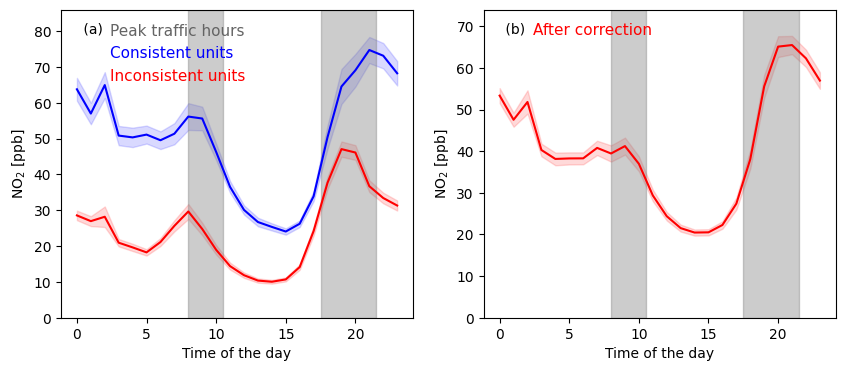

In [107]:
%load_ext autoreload
%autoreload 2

from matplotlib.lines import Line2D
from plot_diurnal import get_diurnal

# path = r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_5104_Kurla_Mumbai_MPCB_2019.csv"
# path = r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_5049_Sector-12_Karnal_HSPCB_2022.csv"
path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning\site_1420_Ashok_Vihar_Delhi_DPCC_2022.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M:%S")
# site = local_df['site_id'][0] + '_' + local_df['site_name'][0] + '_' + local_df['year'][0].astype(str)
# local_df = local_df[local_df['dates'].dt.month.isin(month)]
fig, ax = plt.subplots(1,2, sharey=False, sharex = False,figsize=(10,4))

pol = 'NO2'
# local_df1 = local_df[~((local_df['error'] == 'C1') | (local_df['error'] == 'UNIDENTIFIABLE'))]
# local_df2 = local_df[((local_df['error'] == 'C1') | (local_df['error'] == 'UNIDENTIFIABLE'))]

local_df1 = local_df[((local_df['error'] != 'C1') )]
local_df2 = local_df[((local_df['error'] == 'C1'))]
print(local_df1.shape, local_df2.shape)
get_diurnal(local_df1, pol, 'red', 'title', ax[0])
get_diurnal(local_df2, pol, 'blue', 'title', ax[0])


# local_df1 = local_df[((local_df['error'] != 'C1') )]
# local_df2 = local_df[((local_df['error'] == 'C1'))]
# print(local_df1.shape, local_df2.shape)
# get_diurnal(local_df1, pol, 'red', 'title', ax[0])
# get_diurnal(local_df2, pol, 'blue', 'title', ax[0])
 
 
ax[0].set_xlabel("Time of the day")

get_diurnal(local_df, pol+'_CPCB', 'red', 'title', ax[1])
# get_diurnal(local_df2, pol+'_CPCB', 'blue', 'title', ax[1])


plt.text(.05, .96, ' (a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'none')
plt.text(.05, .96, ' (b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')

ax[0].legend(title = 'Before unit correction', labels = ['Inconsistent unit','Consistent unit'],frameon=False)
ax[0].legend(labels = ['Inconsistent unit','Consistent unit'], frameon=False)
ax[1].legend(title = 'After unit correction', labels = ['Inconsistent unit','Consistent unit'], frameon=False)
ax[1].legend(labels = ['After correction','Consistent unit'],frameon=False)

ax[0].set_ylabel("NO" + '$_{2}$' + ' [ppb]')
ax[1].set_ylabel("NO" + '$_{2}$' + ' [ppb]')
ax[1].set_xlabel("Time of the day")

plt.subplots_adjust(wspace=0.2, hspace=0.25)

legend = ax[0].legend([Line2D([0], [0], color='#646464', lw=0),Line2D([0], [0], color='#0000fd', lw=0),
              Line2D([0], [0], color='#ff0000', lw=0)], 
             ['Peak traffic hours','Consistent units', 
              'Inconsistent units'],facecolor = 'white',labelcolor='linecolor', 
             loc=(0,0.74),framealpha =0, fancybox = False, fontsize = 11)

legend = ax[1].legend([Line2D([0], [0], color='#ff0000', lw=0)], 
             ['After correction'],facecolor = 'white',labelcolor='linecolor', 
             loc=(0,0.89),framealpha =0, fancybox = False,  fontsize = 11)
                
ax[0].axvspan(8, 10.5, alpha=0.4, color='grey')
ax[0].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')

ax[1].axvspan(8, 10.5, alpha=0.4, color='grey')
ax[1].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')
 
# ax[1].set_ylim([-1000,1000])

# plt.suptitle(site)
plt.savefig(f'CPCB_Issues\\AirPy_v2\\new_data\\summary\\final_plots\\Figure_4_{site}.png', dpi=600, bbox_inches="tight")
plt.show()

### Graphical Abstract

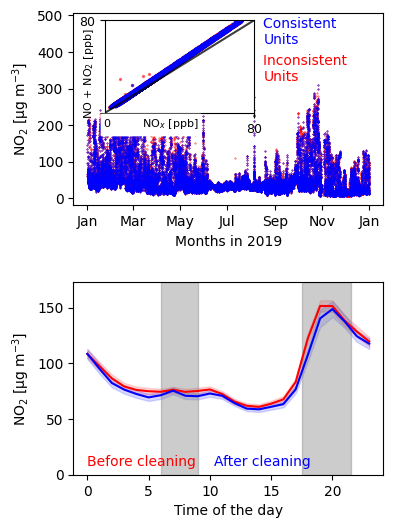

In [39]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from plot_diurnal import get_diurnal
fig, axs = plt.subplots(2, 1, figsize=(4, 6))


# path1 = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_5065_GIDC_Ankleshwar_GPCB_2022.csv")
path1 = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_308_Maninagar_Ahmedabad_GPCB_2019.csv")
# path2 = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_5065_GIDC_Ankleshwar_GPCB_2019.csv")
path2 = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_308_Maninagar_Ahmedabad_GPCB_2023.csv")


# path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning\site_1393_Adarsh_Nagar_Jaipur_RSPCB_2023.csv")
local_df = pd.read_csv(path1)

local_df['dates'] = pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")
local_df['score'] = local_df['error'].apply(lambda x: '#0000fd' if (x == 'C1') else '#ff0000')

ax2 = axs[1]
ax1 = axs[0]
pol = 'NO2'
get_diurnal(local_df, pol, 'red', 'title', ax2)
get_diurnal(local_df, pol+'_CPCB', 'blue', 'title', ax2)

local_df = pd.read_csv(path2)
local_df['dates'] = pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")
local_df['score'] = local_df['error'].apply(lambda x: '#0000fd' if (x == 'C1') else '#ff0000')
ax1.set_xlabel("Months in 2019")

# ax2.set_ylim([0,120])

# ax2.get_legend().remove()
ax2.set_xlabel("Time of the day")
ax1.scatter(local_df['dates'], (local_df['NO2_outliers']), color='red', s=0.1)
ax1.scatter(local_df['dates'], (local_df['NO2_CPCB']), color='blue', s=0.1)
# ax1.scatter(local_df['dates'], (local_df['NO2']), color=local_df['score'], s=0.1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


# plt.text(.03, .96, '(a)', ha='left', va='top', transform=ax1.transAxes,backgroundcolor = 'none')
# plt.text(.03, .96, '(b)', ha='left', va='top', transform=ax2.transAxes,backgroundcolor = 'none')

legend = ax1.legend([Line2D([0], [0], color='#0000fd', lw=0),
                     Line2D([0], [0], color='#ff0000', lw=0)],
                    ['Consistent \nUnits',
                     'Inconsistent \nUnits'], facecolor='white', labelcolor='linecolor',
                    loc=(0.47, 0.6), framealpha=0, fancybox=False, fontsize=10)

legend = ax2.legend([Line2D([0], [0], color='#ff0000', lw=0),
                     Line2D([0], [0], color='#0000fd', lw=0)],
                     ['Before cleaning',
                     'After cleaning'], 
                     facecolor='white', 
                     labelcolor='linecolor',
                     loc=(-0.1,0), 
                     framealpha=0, 
                     fancybox=False,
                     ncols=2,
                     columnspacing=-1.5, 
                     fontsize=10)

ax2.axvspan(6, 9, alpha=0.4, color='grey')
ax2.axvspan(17.5, 21.5, alpha=0.4, color='grey', label='Peak traffic hours')


inset_label = 8
inset_ticks = 9
inset_ax = inset_axes(ax1,
                      height="60%",  # set height
                      width="60%", loc='center left',
                      bbox_to_anchor=(0.08, 0.32, 0.8, 0.8),
                      bbox_transform=ax1.transAxes)
inset_ax.plot([0, 80], [0, 80], color='black', alpha=0.76, linewidth=1.5)

# local_df =  pd.read_csv(path)
# local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")
t = inset_ax.text(-12.5, 22, '         ' + "   " + '  ',
                  size=inset_label, rotation=90, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10, "                         ",
                  size=inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
t = inset_ax.text(1, -10, "                         ",
                  size=inset_label, va='center')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))


# local_df = local_df[local_df['NOx_CPCB'] < 80]
local_df = local_df[(local_df['NO2']/1.88 + local_df['NO']/1.23) < 80]
#
# inset_ax.scatter((local_df['NOx']), (local_df['NO2']/1.88 + local_df['NO']/1.23), color=local_df['score'], s=2, alpha=0.5)
inset_ax.scatter((local_df['NOx']), (local_df['NO2']/1.88 + local_df['NO']/1.23), color='red', s=2, alpha=0.5)
inset_ax.scatter((local_df['NOx_CPCB']), (local_df['NO2_CPCB']/1.88 + local_df['NO_CPCB']/1.23), color='blue', s=2, alpha=0.5)

inset_ax.xaxis.set_tick_params(labelsize=inset_ticks)
inset_ax.yaxis.set_tick_params(labelsize=inset_ticks)
inset_ax.xaxis.set_major_locator(plt.MaxNLocator(1))
inset_ax.yaxis.set_major_locator(plt.MaxNLocator(1))


inset_ax.text(-12.5, 22, '        NO +' + " NO" +
              '$_{2}$ [ppb]', size=inset_label, rotation=90, va='center')
inset_ax.text(1, -10, "          NO" +
              '$_{x}$ [ppb]', size=inset_label, va='center')
inset_ax.text(-1, -10, '0', size=inset_label, va='center')


# ax[2].set_ylim([0,80])
inset_ax.set_xlim([0, 80])
inset_ax.set_ylim([0, 80])
inset_ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
# ax1.yaxis.set_major_locator(plt.MaxNLocator(4))

inset_ax.xaxis.get_major_ticks()[0].label1.set_visible(False)


ax1.set_ylabel('NO' + '$_{2}$' + ' [µg m' + '$^{-3}$' + ']')
ax2.set_ylabel('NO' + '$_{2}$' + ' [µg m' + '$^{-3}$' + ']')
ax1.title.set_size(11)
ax2.title.set_size(11)
fig.subplots_adjust(hspace=0.4, wspace=-1)

# ax1.set_ylim([-10,800])
# ax2.set_ylim([0,150])


# ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
# ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
# ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax2.yaxis.set_major_locator(plt.MaxNLocator(5))


fig.savefig('Figure_ga_sideplot.png', dpi=300, bbox_inches="tight")
plt.show()

       site_id  Before  After
0     site_105       0      0
1     site_106       0      1
2     site_107       0      1
3     site_111       0      0
4     site_113       1      1
..         ...     ...    ...
107  site_5365       0      0
108  site_5367       0      0
109  site_5404       0      1
110  site_5421       0      0
111  site_5423       0      0

[112 rows x 3 columns]
49 21


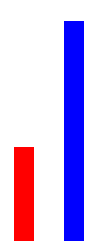

In [35]:
plt.figure(figsize=(1,3))
pol = 'NO2'
df = deepcopy(summary_mean_mapping_2023[summary_mean_mapping_2023['pollutant'] == pol])
df = df[(df['Ozone_DA'] > 50) & (df['Ozone_DA_before'] > 75)]
df = df[df['year'].isin([2020,2021,2022,2019,2023])]
COMPLIANCE_THRESHOLD = 40 if pol in ['NO2','PM25'] else 100
df['Before'] = np.where(df['Ozone'] > COMPLIANCE_THRESHOLD, 1, 0)
df['After'] = np.where(df['Ozone_clean'] > COMPLIANCE_THRESHOLD, 1, 0)
df = df.groupby('site_id').agg({'Before':'sum', 'After':'sum'}).reset_index()
print(df)
non_compliant_before = df['Before'].sum()
non_compliant_after = df['After'].sum()
labels = ['Before Cleaning', 'After Cleaning']
counts = [non_compliant_before, non_compliant_after]
print(non_compliant_after, non_compliant_before)
plt.bar(labels, counts, color=['red', 'blue'], width=0.4, align='center')
plt.axis('off')
plt.savefig('compliance.png', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#Non Compliance for NO2
df = deepcopy(summary_mean_map_plot[summary_mean_map_plot['pollutant'] == pol])


#### Just plot diel variability for all the sites in maroon in panel C (annual NO2 change exceeding 100%) and we choose one from there.

In [75]:
interesting_sites.columns

Index(['site_id', 'year', 'pollutant', 'Pollutant_Uncleaned',
       'Pollutant_Cleaned', 'Percentage_change',
       'compliance_change_non_to_compl', 'compliance_change_compl_to_non',
       'compliance_change', 'timestamp', 'state', 'PM25', 'PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'PM25_consecutives',
       'PM25_outliers', 'PM25_clean', 'PM10_consecutives', 'PM10_outliers',
       'PM10_clean', 'NOx_consecutives', 'NOx_outliers', 'NOx_clean',
       'NO2_consecutives', 'NO2_outliers', 'NO2_clean', 'NO_consecutives',
       'NO_outliers', 'NO_clean', 'Ozone_consecutives', 'Ozone_outliers',
       'Ozone_clean', 'NO_CPCB', 'NO2_CPCB', 'NOx_CPCB', 'Threshold', 'C1',
       'C2', 'C4', 'C6', 'mismatch', 'site_name', 'prevalent_error', 'errors',
       'C3', 'C5', 'C7', 'C8'],
      dtype='object')

In [80]:
interesting_sites = summary_mean_map_plot[(summary_mean_map_plot['Percentage_change'] > 100) & summary_mean_map_plot['pollutant'].str.contains('NO2')]
interesting_sites = pd.merge(interesting_sites, summary_count, on = ['site_id','year'], how = 'left')
interesting_sites.drop_duplicates(['site_id', 'year'], inplace = True)
interesting_sites = interesting_sites[interesting_sites['NO2_CPCB'] > (interesting_sites['NO2'] * 0.75)]

In [34]:
from plot_diurnal import get_diurnal
from tqdm import tqdm
import gc
def draw_diurnal(ax, df:pd.DataFrame,path: str, percentage:float = 0):
   pol = 'NO2'
   get_diurnal(df, pol, 'red', 'title', ax)
   get_diurnal(df, pol+'_CPCB', 'blue', 'title', ax)
   ax.set_xlabel("Time of the day")                  

   ax.axvspan(6, 9, alpha=0.4, color='grey')
   ax.axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')

   ax.set_ylabel('NO' + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')
   fig.suptitle(path.split('\\')[-1].split('.')[0] + f" | %Change: {percentage:.2f}%")
   ax.title.set_size(8)
   fig.subplots_adjust(hspace=0.4, wspace=-1)

   plt.savefig(f"CPCB_Issues\\AirPy_v2\\new_data\\summary\\final_plots\\DIURNAL_PLOTS\\DIURNAL_{site['site_id']}_{site['site_name']}_{site['year']}.png", dpi=300, bbox_inches="tight")


interesting_sites = summary_mean_map_plot[(summary_mean_map_plot['Percentage_change'] > 100) & summary_mean_map_plot['pollutant'].str.contains('NO2')]
interesting_sites = pd.merge(interesting_sites, summary_count, on = ['site_id','year'], how = 'left')
interesting_sites = interesting_sites[(interesting_sites['NO2'] - interesting_sites['NO2_CPCB'])/interesting_sites['NO2'] > 0.75]
# interesting_sites.drop_duplicates(subset=['site_id','year'], keep='first', inplace=True)
# raise KeyboardInterrupt
for  idx, site in enumerate(interesting_sites.to_dict(orient='records')[50:]):
   path = f"CPCB_Issues\\AirPy_v2\\new_data\\After_Cleaning_New\\{site['site_id']}_{site['site_name']}_{site['year']}.csv"
   print(f'{idx:04}',path)
   local_df =  pd.read_csv(path, low_memory=False)
   local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M:%S")
   fig, axs = plt.subplots(1,1,figsize=(4,3))
   draw_diurnal(axs, local_df, path, site['Percentage_change'])


NameError: name 'summary_mean_map_plot' is not defined

### Show Sites

In [22]:
geodf['ST_NM'].unique()

array(['Arunachal Pradesh', 'Assam', 'Chandigarh', 'Karnataka', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tripura', 'Uttarakhand', 'Telangana', 'Bihar', 'Kerala',
       'Madhya Pradesh', 'Andaman & Nicobar', 'Gujarat', 'Lakshadweep',
       'Odisha', 'Dadra and Nagar Haveli and Daman and Diu', 'Ladakh',
       'Jammu & Kashmir', 'Chhattisgarh', 'Delhi', 'Goa', 'Haryana',
       'Himachal Pradesh', 'Jharkhand', 'Tamil Nadu', 'Uttar Pradesh',
       'West Bengal', 'Andhra Pradesh', 'Puducherry', 'Maharashtra'],
      dtype=object)

In [32]:
len(site_master)

539

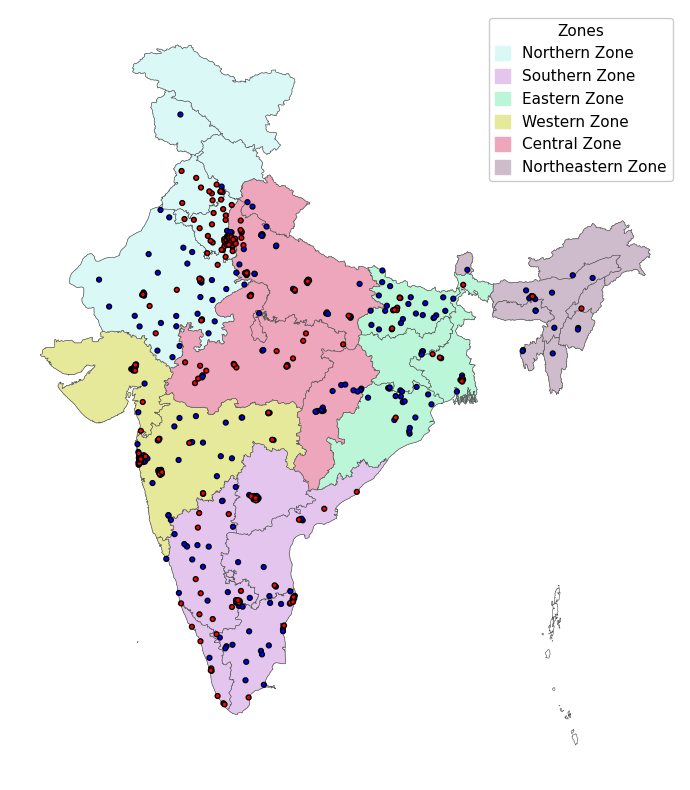

In [182]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1,1,figsize=(10,10))
geodf = gpd.read_file("CPCB_Issues/AirPy_v2/india_state_original.geojson")
geodf.plot(ax = ax, color='white', linewidth=.4,edgecolor='#545454')
northern_zone = ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana','Delhi', 'Rajasthan','Ladakh']
southern_zone = ['Karnataka', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala', 'Telangana']
eastern_zone = ['West Bengal', 'Bihar', 'Jharkhand', 'Odisha']
western_zone = ['Maharashtra', 'Gujarat', 'Goa']
central_zone = ['Madhya Pradesh', 'Chhattisgarh','Uttar Pradesh','Uttarakhand']
northeastern_zone = ['Assam', 'Sikkim', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh', 'Meghalaya']
# zones = [northern_zone, southern_zone, eastern_zone, western_zone, central_zone, northeastern_zone]
zones = {
    'Northern Zone': northern_zone,
    'Southern Zone': southern_zone,
    'Eastern Zone': eastern_zone,
    'Western Zone': western_zone,
    'Central Zone': central_zone,
    'Northeastern Zone': northeastern_zone
}
colors = {
    'Northern Zone': '#daf8f6',
    'Southern Zone': '#e4c5ee',
    'Eastern Zone': '#bcf6d8',
    'Western Zone': '#e6e99a',
    'Central Zone': '#eda6bc',
    'Northeastern Zone': '#cebccc'
}
for zone in zones.keys():
    geodf[geodf['ST_NM'].isin(zones[zone])].plot(ax = ax, color=colors[zone], linewidth=.4,edgecolor='#545454', label=zone)
ax.legend(title = "Zones", loc='upper right',facecolor="white",framealpha=1, handles=[
    mpatches.Patch(color=colors[zone], label=zone) for zone in zones.keys()
])
ax.set_axis_off()
site_master['color'] = np.where(site_master['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
site_master = site_master.sort_values(by = 'color')
ax.scatter(site_master['longitude'],site_master['latitude'], color = site_master['color'], s = 12, edgecolors='black')

plt.savefig('zones.png', dpi=1200, bbox_inches="tight")

In [183]:
geodf_city = gpd.read_file(r"CPCB_Issues\AirPy_v2\india_taluk.geojson")
df = sites_master.rename(columns = {'latitude':'lat', 'longitude':'lon'})
df['color'] = np.where(df['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
mumbai = df[(df['lat'] > 19.03) & (df['lat'] < 19.112) & (df['lon'] > 72.82) & (df['lon'] < 72.9)]
kolkata = df[(df['lat'] > 22.48) & (df['lat'] < 22.662) & (df['lon'] > 88.25) & (df['lon'] < 88.45)]
delhi = df[(df['lat'] > 28.34) & (df['lat'] < 28.88) & (df['lon'] > 76.08) & (df['lon'] < 77.4)]


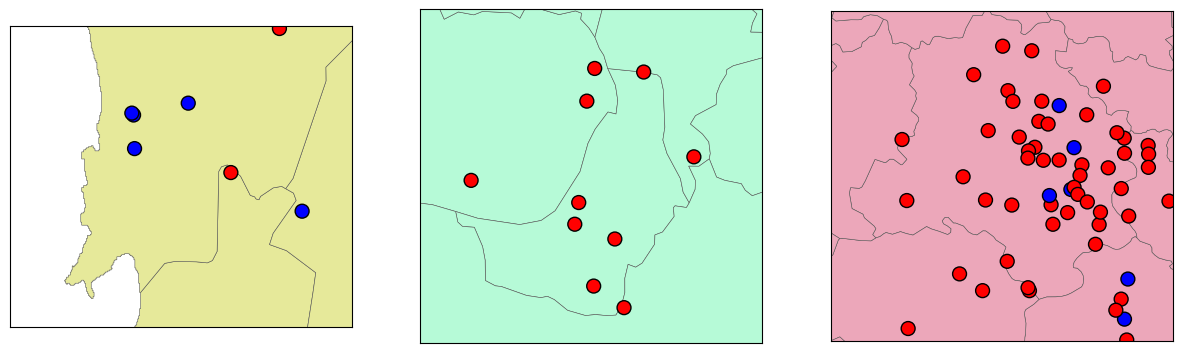

In [97]:

#
fig, axs = plt.subplots(1,3,figsize=(15,5))
ax = axs[0]
ax.set_xlim(72.8,72.9)
ax.set_ylim(19.03,19.112)
geodf_city.plot(ax = ax, color='#e6e99a', linewidth=.4,edgecolor='#545454')
ax.scatter(mumbai['lon'] - 0.01,mumbai['lat'] + 0.025, color = mumbai['color'], s = 100, edgecolors='black')
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

#Kolkata
ax = axs[1]
ax.set_xlim(88.25,88.45)
ax.set_ylim(22.48,22.662)
geodf_city.plot(ax = ax, color='#b6fad7', linewidth=.4,edgecolor='#545454')
ax.scatter(kolkata['lon'],kolkata['lat'], color = kolkata['color'], s = 100, edgecolors='black')
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

#Delhi
ax = axs[2]
ax.set_xlim(76.8,77.4)
ax.set_ylim(28.34,28.88)
geodf_city.plot(ax = ax, color='#eca7ba', linewidth=.4,edgecolor='#545454')
ax.scatter(delhi['lon'],delhi['lat'], color = delhi['color'], s = 100, edgecolors='black')
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

plt.savefig('Figure_SI_inset.png', dpi=1200, bbox_inches="tight")


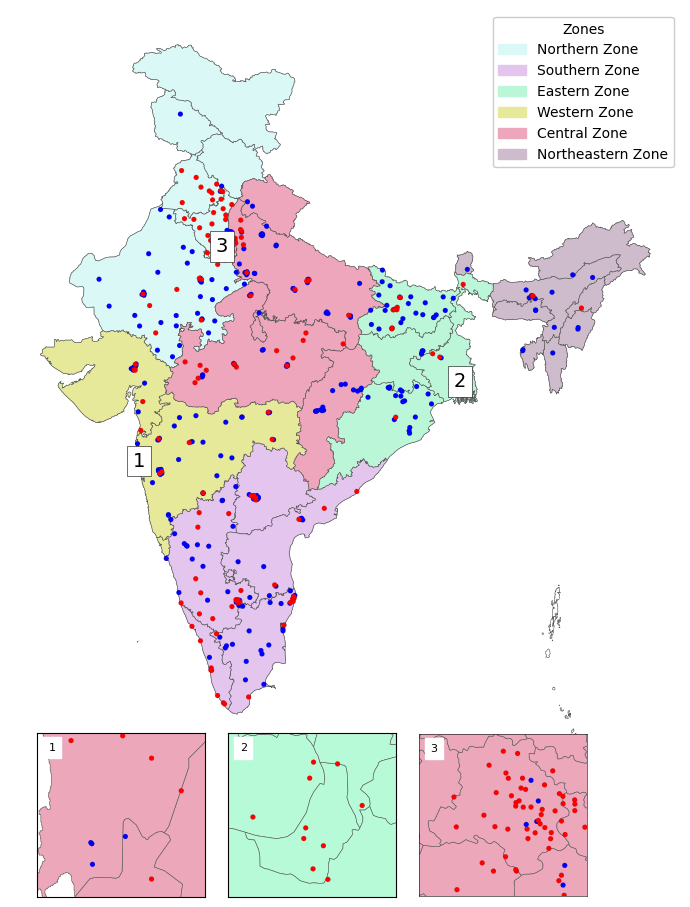

In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1,1,figsize=(10,10))
geodf = gpd.read_file("CPCB_Issues/AirPy_v2/india_state_original.geojson")

geodf.plot(ax = ax, color='white', linewidth=.4,edgecolor='#545454')
northern_zone = ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana','Delhi', 'Rajasthan','Ladakh']
southern_zone = ['Karnataka', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala', 'Telangana']
eastern_zone = ['West Bengal', 'Bihar', 'Jharkhand', 'Odisha']
western_zone = ['Maharashtra', 'Gujarat', 'Goa']
central_zone = ['Madhya Pradesh', 'Chhattisgarh','Uttar Pradesh','Uttarakhand']
northeastern_zone = ['Assam', 'Sikkim', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh', 'Meghalaya']
# zones = [northern_zone, southern_zone, eastern_zone, western_zone, central_zone, northeastern_zone]
zones = {
    'Northern Zone': northern_zone,
    'Southern Zone': southern_zone,
    'Eastern Zone': eastern_zone,
    'Western Zone': western_zone,
    'Central Zone': central_zone,
    'Northeastern Zone': northeastern_zone
}
colors = {
    'Northern Zone': '#daf8f6',
    'Southern Zone': '#e4c5ee',
    'Eastern Zone': '#bcf6d8',
    'Western Zone': '#e6e99a',
    'Central Zone': '#eda6bc',
    'Northeastern Zone': '#cebccc'
}

geodf_city = gpd.read_file(r"CPCB_Issues\AirPy_v2\india_taluk.geojson")
df = sites_master.rename(columns = {'latitude':'lat', 'longitude':'lon'})
df['color'] = np.where(df['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
mumbai = df[(df['lat'] > 19.03) & (df['lat'] < 19.112) & (df['lon'] > 72.82) & (df['lon'] < 72.9)]
kolkata = df[(df['lat'] > 22.48) & (df['lat'] < 22.662) & (df['lon'] > 88.25) & (df['lon'] < 88.45)]
delhi = df[(df['lat'] > 28.34) & (df['lat'] < 28.88) & (df['lon'] > 76.08) & (df['lon'] < 77.4)]

#Mumbai
cbaxes = inset_axes(ax, width="25%", height="25%", loc='lower left',
                    bbox_to_anchor=(-0.01-0.04+0.08,-0.18,1,1), bbox_transform=ax.transAxes)
cbaxes.set_ylim([19.029+0.01, 19.102+0.01])       #mum
cbaxes.set_xlim([72.82, 72.9])          #mum 
geodf_city.plot(ax = cbaxes, color='#eca7ba', linewidth=.4,edgecolor='#545454')
cbaxes.scatter(mumbai['lon'],mumbai['lat'], color = mumbai['color'], s = 13, edgecolors='black', linewidth=0.05)
cbaxes.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.text(.07, .94, '1', ha='left', va='top', transform=cbaxes.transAxes, size= 8, backgroundcolor = 'white')

#Kolkata
cbaxes = inset_axes(ax, width="25%", height="25%", loc='lower center',bbox_to_anchor=(-0.01-0.04,-0.18,1,1), bbox_transform=ax.transAxes)
cbaxes.set_xlim(88.25,88.45)
cbaxes.set_ylim(22.48,22.662)
geodf_city.plot(ax = cbaxes, color='#b6fad7', linewidth=.4,edgecolor='#545454')
cbaxes.scatter(kolkata['lon'],kolkata['lat'], color = kolkata['color'], s = 13, edgecolors='black', linewidth=0.05)
cbaxes.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.text(.07, .94, '2', ha='left', va='top', transform=cbaxes.transAxes, size= 8, backgroundcolor = 'white')

#Delhi
cbaxes = inset_axes(ax, width="25%", height="25%", loc='lower right',
                    bbox_to_anchor=(-0.01-0.05-0.07,-0.18,1,1), bbox_transform=ax.transAxes)
geodf_city.plot(ax = cbaxes, color='#eca7ba', linewidth=.4,edgecolor='#545454')
cbaxes.set_ylim([27.49+0.85,28.88])
cbaxes.set_xlim([76+0.8, 77.4])
cbaxes.scatter(delhi['lon'],delhi['lat'], color = delhi['color'], s = 13, edgecolors='black', linewidth=0.05)
cbaxes.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.text(.07, .94, '3', ha='left', va='top', transform=cbaxes.transAxes, size= 8, backgroundcolor = 'white')
for axis in ['top','bottom','left','right']:
    cbaxes.spines[axis].set_linewidth(0.4)


for zone in zones.keys():
    geodf[geodf['ST_NM'].isin(zones[zone])].plot(ax = ax, color=colors[zone], linewidth=.4,edgecolor='#545454', label=zone)
ax.legend(title = "Zones", loc='upper right',facecolor="white",framealpha=1, handles=[
    mpatches.Patch(color=colors[zone], label=zone) for zone in zones.keys()
])
ax.set_axis_off()
site_master['color'] = np.where(site_master['site_id'].isin(sites_in_consideration['site_id']), 'red', 'blue')
site_master = site_master.sort_values(by = 'color')
ax.scatter(site_master['longitude'],site_master['latitude'], color = site_master['color'], s = 13, edgecolors='black', linewidth=0.05)

ax.annotate('1', xy=(72.82, 19.029+0.01),ha="center", va="center", color='black', fontsize=14,bbox=dict(boxstyle='square', facecolor='white', edgecolor='black',lw=0.4))
ax.annotate('2', xy=(88.25, 22.48),ha="center", va="center", color='black', fontsize=14,bbox=dict(boxstyle='square', facecolor='white', edgecolor='black',lw=.4))
ax.annotate('3', xy=(76+0.8, 27.49+0.85),ha="center", va="center", color='black', fontsize=14,bbox=dict(boxstyle='square', facecolor='white', edgecolor='black',lw=0.4))

plt.savefig('figure_s1.png', dpi=300, bbox_inches="tight")
plt.show()

### Figure S2

C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\3009753865.py:36: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\3009753865.py:65: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\3009753865.py:127: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\3009753865.py:158: FutureW

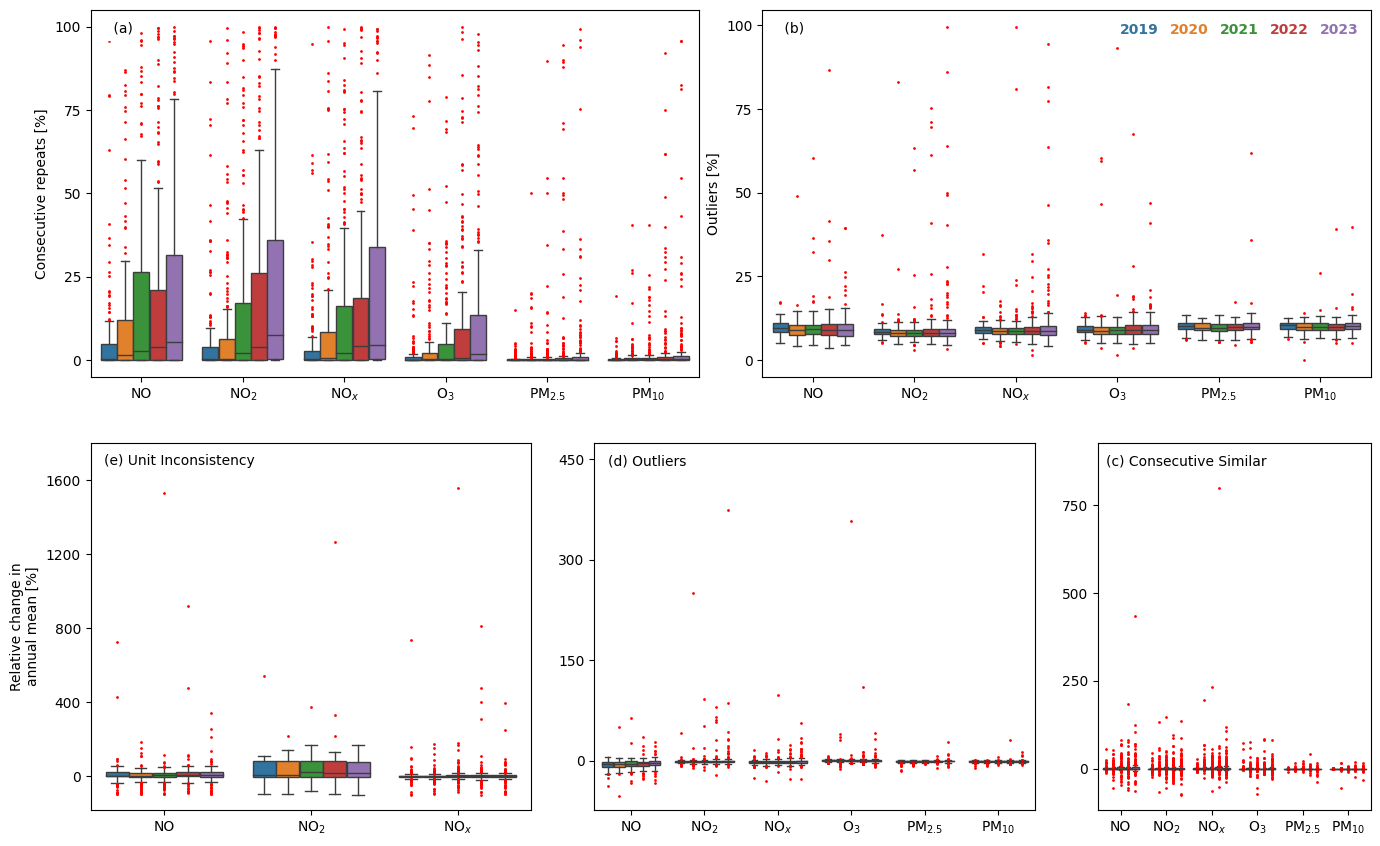

In [123]:
fig = plt.figure(figsize=(16,10))

gs = fig.add_gridspec(2,8)

ax1 = fig.add_subplot(gs[0:1, 0:4])
ax2 = fig.add_subplot(gs[0:1, 4:8])
ax3 = fig.add_subplot(gs[1:2, 0:3])
ax4 = fig.add_subplot(gs[1:2, 3:6])
ax5 = fig.add_subplot(gs[1:2, 6:8])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.7,
                    hspace=0.2)

df = summary_mean

count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count.csv")
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
#     t = t[(t[name+'_clean'] != 0)]
    t.replace(0, np.nan, inplace=True)
    t[name + '_consecutive repeats'] = (t[name] - t[name+'_consecutives'])*100/t[name]
    t[name + '_outliers'] = (t[name+'_consecutives']-t[name+'_outliers'])*100/t[name+'_consecutives']
    if name[:2] == 'NO':
        t[name + '_unit inconsistency'] =  (df[name + '_CPCB']-df[name + '_outliers'])*100/df[name + '_outliers']
per_df = t


melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutive repeats', 'NO2_consecutive repeats', 
                                                            'NOx_consecutive repeats', 'Ozone_consecutive repeats','PM25_consecutive repeats',
                                                            'PM10_consecutive repeats'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops)


# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_ylabel("Consecutive repeats [%]")
ax1.set_xlabel("Pollutants")
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax1.set_ylim([-2, 50])



melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])

# print(melt_df_1)
# exit()


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax2, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )
# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])
ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_ylabel("Outliers [%]")
ax2.set_xlabel("Pollutants")
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax2.set_ylim([4, 12])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)

# ax1.set_ylim([0, 45])
#
from matplotlib.patches import Rectangle
# rectangle = plt.Rectangle((0,0), 50, 20, fc='blue',ec="red",axis = inset_ax1)

# ax1.set_ylim([-2,60])

ax1.get_legend().remove()
ax2.get_legend().remove()
# ax1.set_ylim([-2, 50])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=2.2,
                    hspace=0.3)


# fig.savefig('Figure_S_consecutive_and_outliers_2019_2021.png', dpi=1200, bbox_inches="tight")
#############


count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
t = count_var
df = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone', 'PM25', 'PM10']
for name in lst:
    t[name + '_consecutive repeats'] = (t[name+'_consecutives'] - t[name])*100/t[name]
    t[name + '_outliers'] = (t[name+'_outliers'] - t[name+'_consecutives'])*100/t[name+'_consecutives']
    if name[:2] == 'NO':
        per_df[name + '_Unit inconsistency'] =  (df[name + '_CPCB']-df[name + '_outliers'])*100/df[name + '_outliers']
per_df = t

melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_consecutive repeats', 'NO2_consecutive repeats', 
                                                            'NOx_consecutive repeats', 'Ozone_consecutive repeats','PM25_consecutive repeats',
                                                            'PM10_consecutive repeats'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax5, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )


# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax5.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax5.set_ylabel("Relative change in " + "\n"+"annual mean [%]")
ax5.set_xlabel("Pollutants")
ax5.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax3.set_ylim([-2, 50])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)




melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=2,  markeredgecolor='none')

sns.boxplot(ax = ax4, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops)


# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax4.set_ylabel("Outliers [%]")
ax4.set_xlabel("Pollutants")
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax4.set_ylim([2, 25])



from matplotlib.patches import Rectangle

ax5.get_legend().remove()
ax4.get_legend().remove()

# ax3.set_ylim([-5,30])
# ax4.set_ylim([-15,35])



#================================


#========================
per_df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
for name in ['NO', 'NO2', 'NOx']:
    per_df[name + '_Unit inconsistency'] =  (per_df[name + '_CPCB']-per_df[name + '_outliers'])*100/per_df[name + '_outliers']
melt_df_1 = per_df.melt(id_vars='year', value_vars=[ 'NO_Unit inconsistency', 'NO2_Unit inconsistency', 
                                                            'NOx_Unit inconsistency'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])

sns.boxplot(ax = ax3, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['year'],showfliers = True,linewidth=1,flierprops=flierprops )




ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$'])
ax3.set_ylabel("Outliers [%]")
ax3.set_xlabel("Pollutants")
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax5.set_ylim([-20, 250])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)


ax3.get_legend().remove()


ax3.set_ylabel("Relative change in annual mean [%]")
ax4.set_ylabel("")
ax5.set_ylabel("")

# ax3.set_ylim([-8, 18])

# ax4.set_ylim([-12, 10])

# ax5.set_ylim([-20, 120])


custom_lines = [Line2D([0], [0], color='#3274a1', lw=0),
                Line2D([0], [0], color='#e1812c', lw=0),
                Line2D([0], [0], color='#3a923a', lw=0),
                Line2D([0], [0], color='#c03d3e', lw=0),
                Line2D([0], [0], color='#9372b2', lw=0)]


legend_properties = {'weight':'bold'}
legend = ax2.legend(custom_lines, 
                    ['2019', '2020', '2021', '2022','2023'], 
                    labelcolor='linecolor',
                    loc='best',
                    fontsize=10,
                    prop=legend_properties, 
                    ncols=5,
                    columnspacing=-2)

frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')
# label = Label(frame, text='Hello', font=(18, 'bold'))

# fig.savefig('Figure_S_mean consecutive_and_outliers_2019_2021.png', dpi=1200, bbox_inches="tight")
# fig.savefig('Figure_S_mean consecutive_and_outliers_2019_2021.png', dpi=1200, bbox_inches="tight")


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.18)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")
# fig.suptitle('(B) With outliers ', fontsize=14)

# ax1.set_ylim([-2, 110])
# ax2.set_ylim([-2, 60])
# ax3.set_ylim([-85, 100])
# ax4.set_ylim([-60, 70])
ax3.set_ylim([ax3.get_ylim()[0], ax3.get_ylim()[1] * 1.1])
ax4.set_ylim([ax4.get_ylim()[0], ax4.get_ylim()[1] * 1.2])
ax5.set_ylim([ax5.get_ylim()[0], ax5.get_ylim()[1] * 1.1])

plt.text(.03, .97, ' (a)', ha='left', va='top', transform=ax1.transAxes, backgroundcolor = 'white')
plt.text(.03, .97, ' (b)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'white')
plt.text(.03, .97, '(c) Consecutive Similar', ha='left', va='top', transform=ax5.transAxes,  backgroundcolor = 'none')
plt.text(.03, .97, '(d) Outliers', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none')
plt.text(.03, .97, '(e) Unit Inconsistency', ha='left', va='top',transform=ax3.transAxes, backgroundcolor = 'none')

ax3.set_ylabel("Relative change in" + "\n"+"annual mean [%]")

# fig.savefig('Figure_S_mean consecutive_and_outliers_2019_2021_outliers.png', dpi=400, bbox_inches="tight")
fig.savefig(f'CPCB_Issues\\AirPy_v2\\new_data\\summary\\final_plots\\figure_s2')

plt.show()

### Fig S4 Data Availability

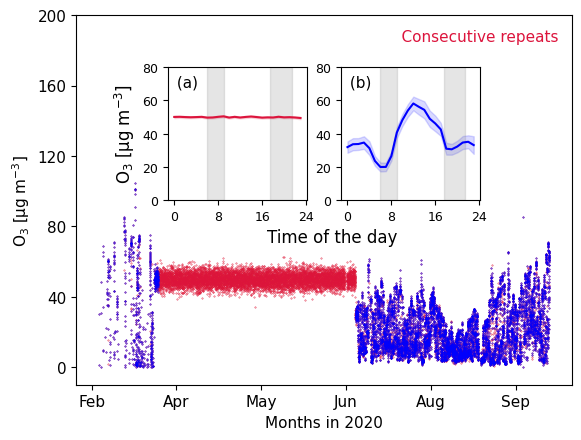

In [129]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
from plot_diurnal import get_diurnal
inset_label = 12

fig, ax = plt.subplots()
import pandas as pd
path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_198_More_Chowk_Waluj_Aurangabad_MPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")


local_df = local_df[(local_df['dates'].dt.month <10) & (local_df['dates'].dt.month >= 3)]

ax.scatter(local_df['dates'],local_df['Ozone'], color = '#FF7722',edgecolors='crimson', s =0.1)
ax.scatter(local_df['dates'],local_df['Ozone_outliers'], color = 'blue', s=0.1)
# # Set xaxis formatter to month abbr with the %b format string
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# plt.ylabel("NO" + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')
plt.ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
plt.xlabel("Months in 2020")
plt.ylim(top=200)
plt.ylim(bottom=-10)


pol ='Ozone'


ax.set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
ax.set_xlabel("Months")
inset_ax = inset_axes(ax,
                      height="45%", # set height
                      width="35%",loc='upper right',
                   bbox_to_anchor=(0.03,0.08,0.8,0.8), bbox_transform=ax.transAxes)
# path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_198_More_Chowk_Waluj_Aurangabad_MPCB_2019.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

df = local_df[(local_df['dates'].dt.month <4) & (local_df['dates'].dt.month >= 0)]
# get_diurnal(df, pol, '#FF7722', 'title', inset_ax)
get_diurnal(df, pol+'_outliers', 'b', 'title', inset_ax)


# path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_198_More_Chowk_Waluj_Aurangabad_MPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

inset_ax1 = inset_axes(ax,
                      height="45%", # set height
                      width="35%",loc='upper left',
                   bbox_to_anchor=(0.17,0.08,0.8,0.8), bbox_transform=ax.transAxes)


df = local_df[(local_df['dates'].dt.month <6) & (local_df['dates'].dt.month > 4)]
get_diurnal(df, pol, 'crimson', 'title', inset_ax1)

inset_ax.axvspan(6, 9, alpha=0.2, color='grey')
inset_ax.axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')
inset_ax1.axvspan(6, 9, alpha=0.2, color='grey')
inset_ax1.axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')
inset_ax1.set_ylim([0,80])
inset_ax.set_ylim([0,80])
# inset_ax = 


legend = ax.legend([Line2D([0], [0], color='crimson', lw=0)], 
             [
              '    Consecutive repeats'],facecolor = 'white',labelcolor='linecolor', 
             loc='upper right',framealpha =0, fancybox = False)


ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

inset_ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
inset_ax1.xaxis.set_major_locator(plt.MaxNLocator(4))

inset_ax.yaxis.set_major_locator(plt.MaxNLocator(4))
inset_ax.xaxis.set_major_locator(plt.MaxNLocator(4))

inset_ax.tick_params(labelsize=9)
inset_ax1.tick_params(labelsize=9)


inset_ax1.set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']',size = inset_label)
inset_ax.set_xlabel("Time of the day                              ", size = inset_label)
plt.text(.03, .94, ' (a)', ha='left', va='top', transform=inset_ax1.transAxes, backgroundcolor = 'none')
plt.text(.03, .94, ' (b)', ha='left', va='top',transform = inset_ax.transAxes, backgroundcolor = 'none')

ax.set_xlabel("Months in 2020")

fig.savefig('Figure_s4.png', dpi=1200, bbox_inches="tight")
# plt.show()

### Fig S3 Heatmap

In [124]:
original_net = pd.read_csv(r'CPCB_Issues/AirPy_v2/new_data/summary/monthly_condensed_new.csv')
print(original_net.shape)
original_net = pd.merge(original_net, summary_mean[['site_id','year','pollutant']], on = ['site_id','year'], how = 'left')
print(original_net.shape)

(12786, 40)
(12786, 41)


C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\2273191416.py:39: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5)


7.0 12.0


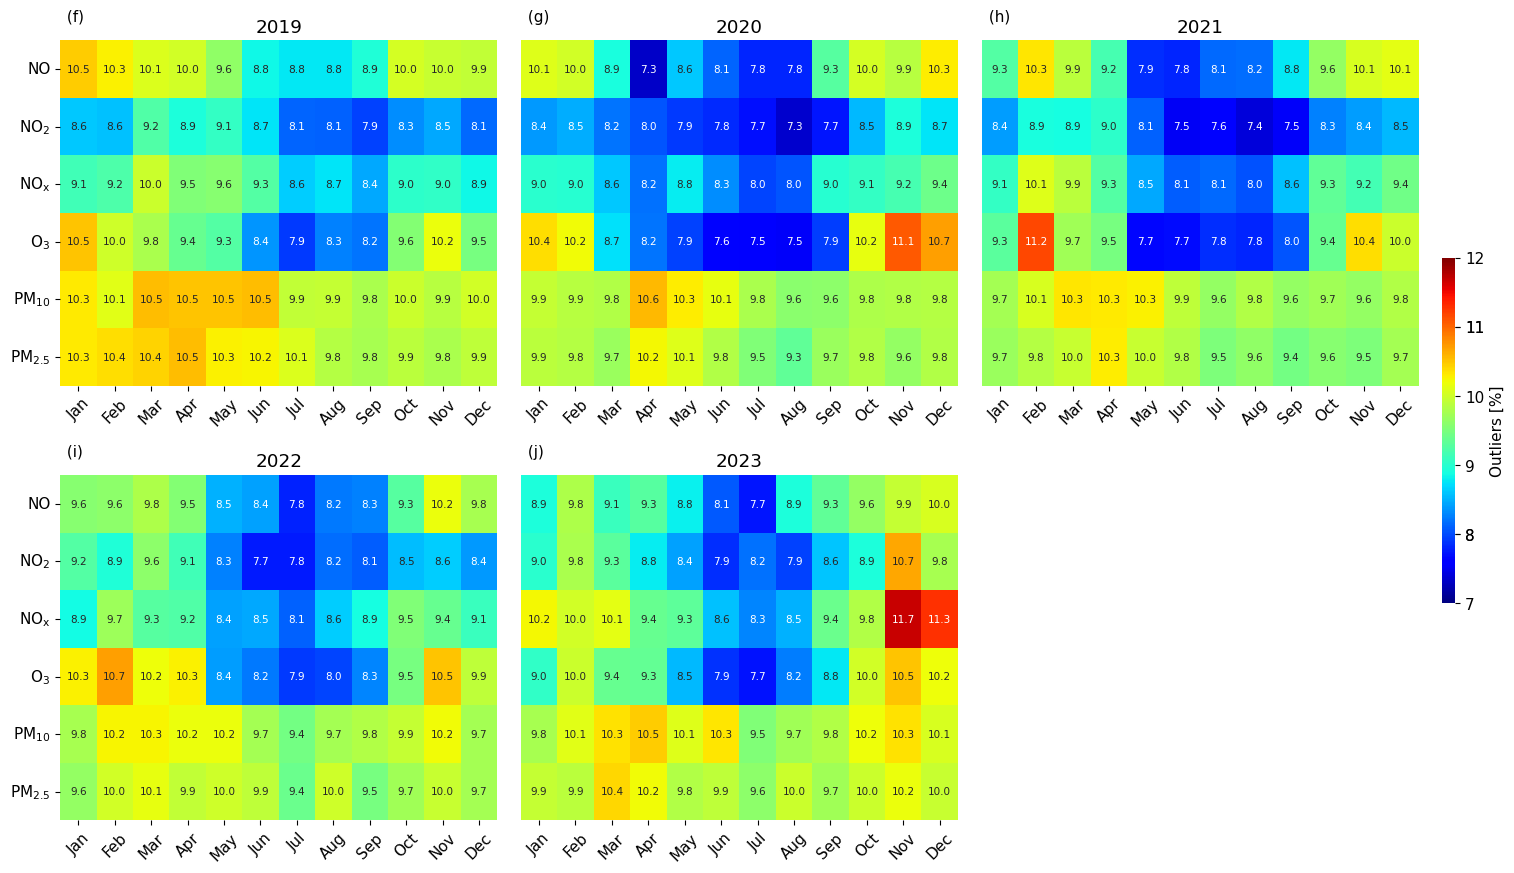

C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\2273191416.py:156: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5)


0.0 26.0


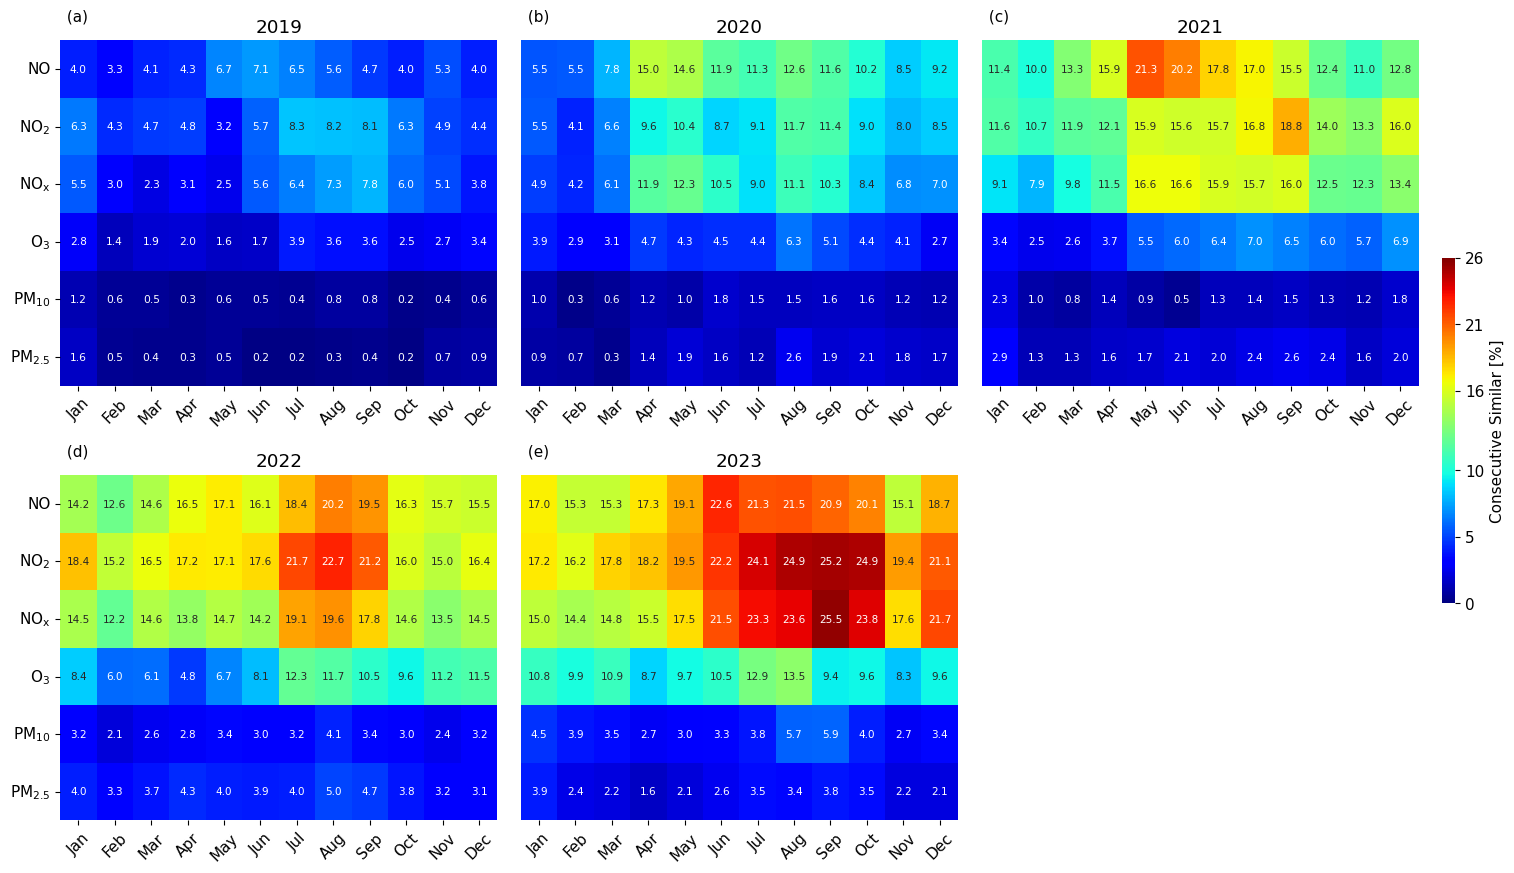

In [133]:
import seaborn  as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import pandas as pd

def plot_outlier_heatmap(monthly_condensed_summary: str, savefile: str):
    pols = ['NO', 'NO2', 'NOx', 'Ozone', 'PM10', 'PM25']
    original_net = pd.read_csv(monthly_condensed_summary)
    original_net = pd.merge(original_net, summary_mean[['site_id','year','pollutant']], on = ['site_id','year'], how = 'left')
    melts = pd.DataFrame(columns=['year','month','pol','repeats'])
    for pol in pols:
        net = deepcopy(original_net.loc[original_net['pollutant'].str.contains('NO2' if pol in ['NOx','NO'] else pol)])
        net[pol] = (net[pol + '_consecutives'] - net[pol + '_outliers'])/net[pol + '_consecutives'] * 100
        # temp = net.groupby(['year','month'])
        temp = net.melt(id_vars=['year','month'], value_vars=[pol], var_name='pol', value_name='repeats')
        # print(temp.columns)
        melts = pd.concat([melts,temp], axis=0)
    # print(melts[melts['repeats'] > 70])
    net = melts
    
    matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
    matplotlib.rcParams['legend.handlelength'] = 1
    matplotlib.rcParams['legend.handleheight'] = 1
    params = {'mathtext.default': 'regular' }         
    sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
    plt.rcParams.update(params)

    # f,(ax1,ax2,ax3,ax4,ax5,axcb) = plt.subplots(1,6, figsize=(25,3),gridspec_kw={'width_ratios':[1,1,1,1,1,0.08]})
    f = plt.figure(figsize=(18,10))
    gs = f.add_gridspec(4,10)
    gs.set_width_ratios([1,1,1,1,1,1,1,1,1,0.1])
    ax1 = f.add_subplot(gs[0:2,0:3])
    ax2 = f.add_subplot(gs[0:2,3:6])
    ax3 = f.add_subplot(gs[0:2,6:9])
    ax4 = f.add_subplot(gs[2:4,0:3])
    ax5 = f.add_subplot(gs[2:4,3:6])
    axcb = f.add_subplot(gs[1:3,9:10])
    ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5)
    plt.subplots_adjust(hspace=0.7, bottom=0.1)
    
    vmin = 999999999
    vmax = -999999999
    for i in [2019,2020,2021,2022,2023]:
        net1 = net[(net['year'] == i)]
        heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
        vmin = min(np.floor(heatmap_data.min().min()),vmin)
        vmax = max(np.ceil(heatmap_data.max().max()),vmax)
    print(vmin,vmax)
    
    net1 = net[(net['year'] == 2019)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g1 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax1,annot=True,fmt='.1f',annot_kws={"fontsize":7.7}, vmin=vmin, vmax=vmax)
    # g1.set_ylabel('Pollutant')
    g1.set_ylabel('')
    g1.set_xlabel('')

    net1 = net[(net['year'] == 2020)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g2 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax2,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
    g2.set_ylabel('')
    g2.set_xlabel('')
    g2.set_yticks([])


    net1 = net[(net['year'] == 2021)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g3 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax3,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
    g3.set_ylabel('')
    g3.set_xlabel('')
    g3.set_yticks([])

    net1 = net[(net['year'] == 2022)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g4 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax4,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
    # g4.set_ylabel('Pollutant')
    g4.set_ylabel('')
    g4.set_xlabel('')
    # g4.set_yticks([])

    net1 = net[(net['year'] == 2023)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g5 = sns.heatmap(heatmap_data,cmap="jet",ax=ax5, cbar_ax=axcb,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},cbar_kws={'label': 'Outliers [%]','ticks':np.round(np.linspace(vmin,vmax,8,endpoint=True))},vmin=vmin, vmax=vmax)
    axcb.set_ylim(vmin, vmax)
    g5.set_xlabel('')
    g5.set_ylabel('')
    g5.set_yticks([])


    # may be needed to rotate the ticklabels correctly:
    for ax in [g1,g2,g3,g4,g5]:
        tl = ax.get_xticklabels()
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
        tly = ax.get_yticklabels()
        ax.set_yticklabels(tly, rotation=0)

        
    ax1.set_title("2019")
    ax2.set_title("2020")
    ax3.set_title('2021')
    ax4.set_title('2022')
    ax5.set_title('2023')
    # g2.set_xlabel('Months')
    matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
    matplotlib.rcParams['legend.handlelength'] = 1
    matplotlib.rcParams['legend.handleheight'] = 1
    params = {'mathtext.default': 'regular' }         
    sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
    plt.rcParams.update(params)


    g1.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
    g4.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
    plt.text(.005, 1.09, ' (f)', ha='left', va='top', transform=ax1.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (g)', ha='left', va='top', transform=ax2.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (h)', ha='left', va='top', transform=ax3.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (i)', ha='left', va='top', transform=ax4.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (j)', ha='left', va='top', transform=ax5.transAxes, size= 11, backgroundcolor = 'none')

    plt.show()
    f.savefig(savefile, dpi=400, bbox_inches="tight")


def plot_consecutives_heatmap(monthly_condensed_summary: str, savefile: str):
    pols = ['NO', 'NO2', 'NOx', 'Ozone', 'PM10', 'PM25']
    original_net = pd.read_csv(monthly_condensed_summary)
    original_net = pd.merge(original_net, summary_mean[['site_id','year','pollutant']], on = ['site_id','year'], how = 'left')
    melts = pd.DataFrame(columns=['year','month','pol','repeats'])
    for pol in pols:
        net = deepcopy(original_net.loc[original_net['pollutant'].str.contains('NO2' if pol in ['NOx','NO'] else pol)])
        net[pol] = (net[pol] - net[pol + '_consecutives'])/net[pol] * 100
        # temp = net.groupby(['year','month'])
        temp = net.melt(id_vars=['year','month'], value_vars=[pol], var_name='pol', value_name='repeats')
        # print(temp.columns)
        melts = pd.concat([melts,temp], axis=0)
    # print(melts)
    net = melts

    matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
    matplotlib.rcParams['legend.handlelength'] = 1
    matplotlib.rcParams['legend.handleheight'] = 1
    params = {'mathtext.default': 'regular' }         
    sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
    plt.rcParams.update(params)

    # f,(ax1,ax2,ax3,ax4,ax5,axcb) = plt.subplots(1,6, figsize=(25,3),gridspec_kw={'width_ratios':[1,1,1,1,1,0.08]})
    f = plt.figure(figsize=(18,10))
    gs = f.add_gridspec(4,10)
    gs.set_width_ratios([1,1,1,1,1,1,1,1,1,0.1])
    ax1 = f.add_subplot(gs[0:2,0:3])
    ax2 = f.add_subplot(gs[0:2,3:6])
    ax3 = f.add_subplot(gs[0:2,6:9])
    ax4 = f.add_subplot(gs[2:4,0:3])
    ax5 = f.add_subplot(gs[2:4,3:6])
    axcb = f.add_subplot(gs[1:3,9:10])
    ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5)
    plt.subplots_adjust(hspace=0.7, bottom=0.1)
    vmin = 999999999
    vmax = -999999999
    for i in [2019,2020,2021,2022,2023]:
        net1 = net[(net['year'] == i)]
        heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
        vmin = min(np.floor(heatmap_data.min().min()),vmin)
        vmax = max(np.ceil(heatmap_data.max().max()),vmax)
    print(vmin,vmax)
    net1 = net[(net['year'] == 2019)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g1 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax1,annot=True,fmt='.1f',annot_kws={"fontsize":7.7},vmin=vmin, vmax=vmax)
    # g1.set_ylabel('Pollutant')
    g1.set_ylabel('')
    g1.set_xlabel('')

    net1 = net[(net['year'] == 2020)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g2 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax2,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
    g2.set_ylabel('')
    g2.set_xlabel('')
    g2.set_yticks([])


    net1 = net[(net['year'] == 2021)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g3 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax3,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
    g3.set_ylabel('')
    g3.set_xlabel('')
    g3.set_yticks([])

    net1 = net[(net['year'] == 2022)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g4 = sns.heatmap(heatmap_data,cmap="jet",cbar=False,ax=ax4,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},vmin=vmin, vmax=vmax)
    # g4.set_ylabel('Pollutant')
    g4.set_ylabel('')
    g4.set_xlabel('')

    net1 = net[(net['year'] == 2023)]
    heatmap_data = pd.pivot_table(net1, values='repeats', index=['pol'], columns='month')
    g5 = sns.heatmap(heatmap_data,cmap="jet",ax=ax5, cbar_ax=axcb,annot=True,fmt='.1f',annot_kws={"fontsize":7.5},cbar_kws={'label': 'Consecutive Similar [%]', 'ticks':np.round(np.linspace(vmin,vmax,6,endpoint=True))}, vmin=vmin, vmax=vmax)
    axcb.set_ylim(axcb.set_ylim(vmin, vmax))
    g5.set_xlabel('')
    g5.set_ylabel('')
    g5.set_yticks([])


    # may be needed to rotate the ticklabels correctly:
    for ax in [g1,g2,g3,g4,g5]:
        tl = ax.get_xticklabels()
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
        tly = ax.get_yticklabels()
        ax.set_yticklabels(tly, rotation=0)

        
    ax1.set_title("2019")
    ax2.set_title("2020")
    ax3.set_title('2021')
    ax4.set_title('2022')
    ax5.set_title('2023')
    # g2.set_xlabel('Months')
    matplotlib.rcParams.update({'font.size': 11, "font.family": "Arial"})
    matplotlib.rcParams['legend.handlelength'] = 1
    matplotlib.rcParams['legend.handleheight'] = 1
    params = {'mathtext.default': 'regular' }         
    sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
    plt.rcParams.update(params)


    g1.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
    g4.set_yticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{10}$', "PM" + '$_{2.5}$'])
    plt.text(.005, 1.09, ' (a)', ha='left', va='top', transform=ax1.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (b)', ha='left', va='top', transform=ax2.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (c)', ha='left', va='top', transform=ax3.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (d)', ha='left', va='top', transform=ax4.transAxes, size= 11, backgroundcolor = 'none')
    plt.text(.005, 1.09, ' (e)', ha='left', va='top', transform=ax5.transAxes, size= 11, backgroundcolor = 'none')

    plt.show()
    f.savefig(savefile, dpi=400, bbox_inches="tight")
if __name__ == '__main__':
    plot_outlier_heatmap(r'CPCB_Issues/AirPy_v2/new_data/summary/monthly_condensed_new.csv','figure_s3_1.png')
    plot_consecutives_heatmap(r'CPCB_Issues/AirPy_v2/new_data/summary/monthly_condensed_new.csv','figure_s3_2.png')

### Fig S5 Comparision of NO NO2 and NOX

In [33]:
directory = r'CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New'
NOx = []
NO2 = []
NO = []
NOx_CPCB = []
NO2_CPCB = []
NO_CPCB= []
score = []
for filename in os.listdir(directory):
    path = os.path.join(directory, filename)
    year = '2019'
    station_name = filename.replace(".csv", "")
    # station_name = station_name.split("_")[0]
    print(station_name)
    local_df = pd.read_csv(path, usecols=['NO2', 'NO', 'NOx', 'NO_CPCB', 'NO2_CPCB', 'NOx_CPCB', 'error'])
    # local_df = local_df[['NO2', 'NO', 'NOx', 'NO_std', 'NO2_CPCB', 'NOx_CPCB', 'error']].copy()
    # local_df = local_df.dropna()
    try:
        score.extend(local_df['error'].tolist())
        NOx.extend(local_df['NOx'].tolist())
        NO2.extend(local_df['NO2'].tolist())
        NO.extend(local_df['NO'].tolist())
        NOx_CPCB.extend(local_df['NOx_CPCB'].tolist())
        NO2_CPCB.extend(local_df['NO2_CPCB'].tolist())
        NO_CPCB.extend(local_df['NO_CPCB'].tolist())
    except Exception as e:
        print(e)
        pass
    
df = pd.DataFrame()
df['NO'] = NO
df['NO2'] = NO2
df['NOx'] = NOx
df['NO_std'] = NO_CPCB
df['NO2_std'] = NO2_CPCB
df['NOx_std'] = NOx_CPCB



df['score'] = score
df['score'] = df['score'].apply(lambda x: 'red' if x == 'red' else 'blue')
# df = df[df['score'] != 'yellow']
all_df = df
df = all_df
# fig, ax = plt.subplots(1,3, sharey=False, sharex=True,figsize=(7,3),gridspec_kw={'width_ratios': [2.5, 2.5, 2.5]})
fig, ax = plt.subplots(1,3, sharey=False,figsize=(7.5,2.5),gridspec_kw={'width_ratios': [3,3,3]})

ax[0].scatter(df['NO']/1.23,df['NO_std']/1.23, color = df['score'], s =3,marker = '.')

ax[1].scatter(df['NO2']/1.88,df['NO2_std']/1.88, s =3,marker = '.', color = df['score'])
ax[2].scatter(df['NOx'],df['NOx_std'], color = df['score'], s =3,marker = '.')
ax[1].set_xlabel("Reported oxides of nitrogen " +'[ppb]')
ax[0].set_ylabel("Calculated oxides of nitrogen " +'[ppb]')


df = df[df['score'] != 'blue']
ax[2].scatter(df['NOx'],df['NOx_std'], color = df['score'], s =3,marker = '.')



for axis in ax:
    axis.plot([0,600], [0,600], color = 'black', linewidth=0.5)

#     axis.legend(loc='upper right',facecolor="white",framealpha=1)
#     lgnd = axis.legend(loc="upper right", scatterpoints=1, fontsize=8)
#     lgnd.legendHandles[0]._sizes = [50]
#     lgnd.get_frame().set_alpha(1)
#     lgnd.get_frame().set_edgecolor('white')
    
plt.text(.05, .96, '(a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(c)', ha='left', va='top', transform=ax[2].transAxes,backgroundcolor = 'white')


plt.text(0.4 ,.96, "NO", ha='left', va='top',transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(0.4 ,.96, "NO" + '$_{2}$', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')
plt.text(0.4 ,.96, "NO" + '$_{x}$', ha='left', va='top', transform=ax[2].transAxes,backgroundcolor = 'white')

# ax[0].set_xlim([1,50])
# ax[0].set_ylim([1,50])
# ax[1].set_xlim([1,50])
# ax[1].set_ylim([1,50])
# ax[2].set_xlim([1,50])
# ax[2].set_ylim([1,50])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# fig.savefig('noxunits.png', dpi=1200)
fig.savefig('Figure_S_noxunits.png', dpi=1200,bbox_inches="tight")

plt.show()

site_103_CRRI_Mathura_Road_Delhi_IMD_2019
site_103_CRRI_Mathura_Road_Delhi_IMD_2020
site_103_CRRI_Mathura_Road_Delhi_IMD_2021
site_103_CRRI_Mathura_Road_Delhi_IMD_2022
site_103_CRRI_Mathura_Road_Delhi_IMD_2023
site_105_North_Campus_DU_Delhi_IMD_2019
site_105_North_Campus_DU_Delhi_IMD_2020
site_105_North_Campus_DU_Delhi_IMD_2021
site_105_North_Campus_DU_Delhi_IMD_2022
site_105_North_Campus_DU_Delhi_IMD_2023
site_106_IGI_Airport_(T3)_Delhi_IMD_2019
site_106_IGI_Airport_(T3)_Delhi_IMD_2020
site_106_IGI_Airport_(T3)_Delhi_IMD_2021
site_106_IGI_Airport_(T3)_Delhi_IMD_2022
site_106_IGI_Airport_(T3)_Delhi_IMD_2023
site_107_Pusa_Delhi_IMD_2019
site_107_Pusa_Delhi_IMD_2020
site_107_Pusa_Delhi_IMD_2021
site_107_Pusa_Delhi_IMD_2022
site_107_Pusa_Delhi_IMD_2023
site_108_Aya_Nagar_Delhi_IMD_2019
site_108_Aya_Nagar_Delhi_IMD_2020
site_108_Aya_Nagar_Delhi_IMD_2021
site_108_Aya_Nagar_Delhi_IMD_2022
site_108_Aya_Nagar_Delhi_IMD_2023
site_109_Lodhi_Road_Delhi_IMD_2019
site_109_Lodhi_Road_Delhi_IMD_2020


C:\Users\hitan\AppData\Local\Temp\ipykernel_12940\1155919108.py:15: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  local_df = pd.read_csv(path, usecols=['NO2', 'NO', 'NOx', 'NO_CPCB', 'NO2_CPCB', 'NOx_CPCB', 'error'])


site_118_DTU_Delhi_CPCB_2023
site_119_Sirifort_Delhi_CPCB_2019
site_119_Sirifort_Delhi_CPCB_2020
site_119_Sirifort_Delhi_CPCB_2021
site_119_Sirifort_Delhi_CPCB_2022
site_119_Sirifort_Delhi_CPCB_2023
site_122_Mandir_Marg_Delhi_DPCC_2019
site_122_Mandir_Marg_Delhi_DPCC_2020
site_122_Mandir_Marg_Delhi_DPCC_2021
site_122_Mandir_Marg_Delhi_DPCC_2022
site_122_Mandir_Marg_Delhi_DPCC_2023
site_124_R_K_Puram_Delhi_DPCC_2019
site_124_R_K_Puram_Delhi_DPCC_2020
site_124_R_K_Puram_Delhi_DPCC_2021
site_124_R_K_Puram_Delhi_DPCC_2022
site_124_R_K_Puram_Delhi_DPCC_2023
site_125_Punjabi_Bagh_Delhi_DPCC_2019
site_125_Punjabi_Bagh_Delhi_DPCC_2020
site_125_Punjabi_Bagh_Delhi_DPCC_2021
site_125_Punjabi_Bagh_Delhi_DPCC_2022
site_125_Punjabi_Bagh_Delhi_DPCC_2023
site_136_Collectorate_Jodhpur_RSPCB_2019


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

### Fig S5: Identification of extreme outliers

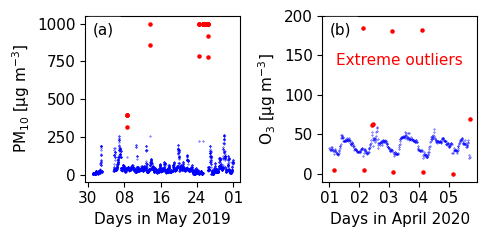

In [34]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 11

# font = {'family' : 'sans-serif', 'serif' : 'Arial', 'size' : BIGGER_SIZE} 
# plt.rc('font', **font)
# # plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig, ax = plt.subplots(1,2, sharey=False,figsize=(5,2.5),gridspec_kw={'width_ratios': [3,3]})

path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_5073_Railway_Colony_Guwahati_PCBA_2019.csv")

local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")
local_df = local_df[(local_df['dates'].dt.month == 5)]
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[0].scatter(local_df['dates'],(local_df['PM10']) , color = 'b', s = 0.1)
df_1 = local_df[(local_df['PM10'] > 300)]

ax[0].scatter(df_1['dates'],df_1['PM10'], color = 'r', s= 5)

ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax[0].set_ylabel("PM" + '$_{10}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[0].set_xlabel("Days in May 2019")


ax[0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_252_Plammoodu_Thiruvananthapuram_Kerala_PCB_2020.csv")

local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month == 4)&(local_df['dates'].dt.day <= 5)]

ax[1].scatter(local_df['dates'],(local_df['Ozone']) , color = 'b', s = 0.1)

df_1 = local_df[(local_df['Ozone'] > 60)]

ax[1].scatter(df_1['dates'],df_1['Ozone'], color = 'r', s= 5)

df_1 = local_df[(local_df['Ozone'] < 10)]

ax[1].scatter(df_1['dates'],df_1['Ozone'], color = 'r', s= 5)


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax[1].set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[1].set_xlabel("Days in April 2020")
ax[1].set_ylim([-10,200])
# ax[0].set_ylim([0,300])
fig.tight_layout()



legend = ax[1].legend([Line2D([0], [0], color='#0000fd', lw=0),
              Line2D([0], [0], color='#ff0000', lw=0)], 
             ['  ', 
              'Extreme outliers'],facecolor = 'white',labelcolor='linecolor',
             loc='upper right',framealpha =0, fancybox = False)



ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(6))

ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))
plt.text(.05, .96, '(a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')


fig.savefig('Figure_s_outliers.png', dpi=1200, bbox_inches="tight")


### Figure S9: Impact of cleaning

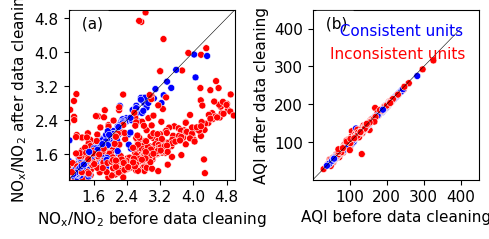

In [135]:
df = pd.read_csv(r'CPCB_Issues\AirPy_v2\new_data\summary\summary_mean_AQI.csv')

df['Before_NOx_NO2_ratio'] = df['NOx']/(df['NO2']/1.88)
df['After_NOx_NO2_ratio'] = df['NOx_CPCB']/(df['NO2_CPCB']/1.88)
# df['df['unit_inconsistency'] == 'yes'']
df['relative'] = (df['After_NOx_NO2_ratio'] - df['Before_NOx_NO2_ratio'])*100/df['Before_NOx_NO2_ratio']
# df[df['unit_inconsistency'] == 'no']['relative'].mean(),df[df['unit_inconsistency'] == 'yes']['relative'].std()
fig, ax = plt.subplots(1,2, sharey=False,sharex=False,figsize=(5,2.5),gridspec_kw={'width_ratios': [3,3]})

ax[0].plot([1,7], [1,7], c = 'black', lw=0.4)
df['unit_inconsistency'] = df['prevalent_error'].apply(lambda x: 'red' if x == 'C1' else 'blue')
g =sns.scatterplot(ax = ax[0], x="Before_NOx_NO2_ratio", y="After_NOx_NO2_ratio",
              hue="unit_inconsistency",
              data=df, s = 25, palette = ['red', 'blue']);

ax[0].set_xlim([1,5])
ax[0].set_ylim([1,5])



ax[0].set_xlabel("NO" + '$_{x}$' + '/NO'+ '$_{2}$' + ' before data cleaning')
ax[0].set_ylabel("NO" + '$_{x}$' + '/NO'+ '$_{2}$' + ' after data cleaning')
ax[0].get_legend().remove()

ax[1].plot([1,400], [1,400], c = 'black', lw=0.4)
g = sns.scatterplot(ax = ax[1], x="AQI_before_cleaning", y="AQI_after_cleaning",hue="unit_inconsistency",data=df, s = 25, palette = ['red', 'blue'])

ax[1].set_xlim([1,450])
ax[1].set_ylim([1,450])



ax[1].set_xlabel('AQI before data cleaning')
ax[1].set_ylabel('AQI after data cleaning')
ax[1].get_legend().remove()


legend = ax[1].legend([Line2D([0], [0], color='#0000fd', lw=0),
              Line2D([0], [0], color='#ff0000', lw=0)], 
             ['  Consistent units', 
              'Inconsistent units'],facecolor = 'white',labelcolor='linecolor',
             loc='upper right',framealpha =0, fancybox = False)


ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))

fig.tight_layout(pad=1)
plt.text(.05, .96, ' (a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')

fig.savefig('Figure_s9.png', dpi=1200, bbox_inches="tight")



### Fig S10 erronous waves

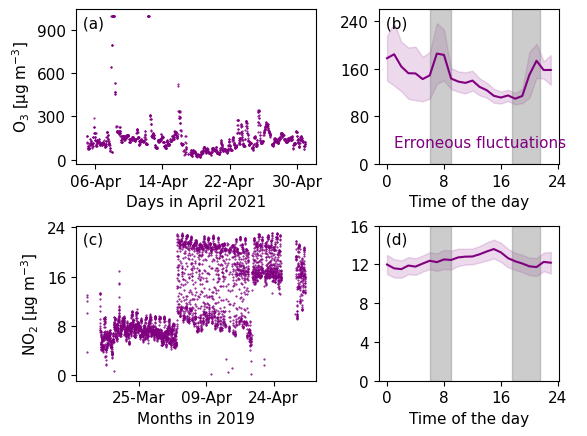

In [136]:
from plot_diurnal import get_diurnal
path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1393_Adarsh_Nagar_Jaipur_RSPCB_2019.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month == 4)&(local_df['dates'].dt.day >4)&(local_df['dates'].dt.day <31)]

fig, ax = plt.subplots(2,2, figsize=(6,4.5),gridspec_kw={'width_ratios': [4, 3]})

pol = 'PM10_clean'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[0,0].scatter(local_df['dates'],local_df[pol], color = 'purple', s =1,marker = '.')
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax[0,0].set_ylabel("O" + '$_{3}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[0,0].set_xlabel("Days in April 2021")
# ax[0,0].set_ylim([0,60])
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))

get_diurnal(local_df, pol, 'purple', 'title', ax[0,1])
ax[0,1].set_xlabel("Time of the day")


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1408_Talcher_Coalfields_Talcher_OSPCB_2019.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month == 3) | (local_df['dates'].dt.month == 4)]

pol = 'NO2'
ax[1,0].scatter(local_df['dates'],local_df[pol], color = 'purple', s =1,marker = '.')
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax[1,0].set_ylabel("NO" + '$_{2}$'+ ' [µg m' + '$^{-3}$' + ']')
ax[1,0].set_xlabel("Months in 2019")

get_diurnal(local_df, pol, 'purple', 'title', ax[1,1])
ax[1,1].set_xlabel("Time of the day")


ax[1,1].axvspan(6, 9, alpha=0.4, color='grey')
ax[1,1].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')
ax[0,1].axvspan(6, 9, alpha=0.4, color='grey')
ax[0,1].axvspan(17.5, 21.5, alpha=0.4, color='grey', label = 'Peak traffic hours')

fig.tight_layout()

plt.text(.01, .96, ' (a)', ha='left', va='top', transform=ax[0,0].transAxes)
plt.text(.01, .96, ' (b)', ha='left', va='top', transform=ax[0,1].transAxes)
plt.text(.01, .96, ' (c)', ha='left', va='top', transform=ax[1,0].transAxes)
plt.text(.01, .96, ' (d)', ha='left', va='top', transform=ax[1,1].transAxes)


ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(3))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(4))

# ax[1,0].set_ylim([0,25])
# ax[1,1].set_ylim([0,25])


legend = ax[0,1].legend([Line2D([0], [0], color='purple', lw=0)], 
             ['Erroneous fluctuations '],facecolor = 'white',labelcolor='linecolor', 
             loc='lower center',framealpha =1, fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')

for axis in ax:
    for axes in axis:
        
        axes.xaxis.set_major_locator(plt.MaxNLocator(4))
        axes.yaxis.set_major_locator(plt.MaxNLocator(4))

fig.savefig('Figure_s10.png', dpi=1200, bbox_inches="tight")
plt.show()

### Figure S11

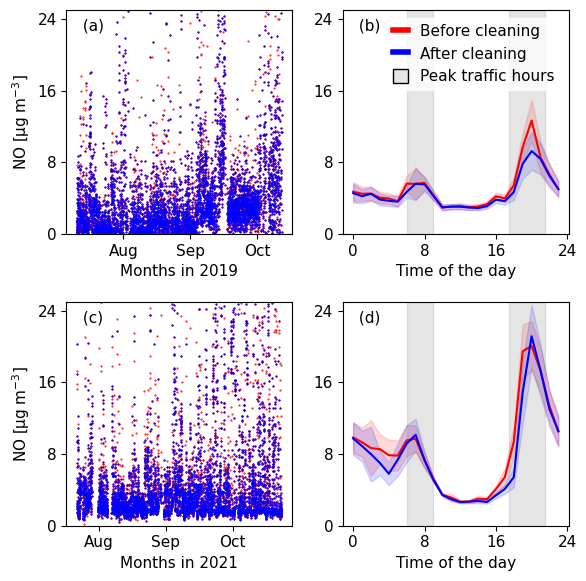

In [137]:
from matplotlib.patches import Patch
import matplotlib
path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1541_Knowledge_Park_III_Greater_Noida_UPPCB_2019.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month >= 8)&(local_df['dates'].dt.month <11)]

fig, ax = plt.subplots(2,2, sharey=False,figsize=(6,6),gridspec_kw={'width_ratios': [2.5, 2.5]})
# plt.figure(figsize=(3,6))

pol = 'NO'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[0,0].scatter(local_df['dates'],local_df[pol], color = 'red', s =1,marker = '.')
ax[0,0].scatter(local_df['dates'],local_df[pol + '_outliers'], color = 'blue', s =1,marker = '.')
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0,0].set_ylabel("NO" + ' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[0,0].set_xlabel("Months in 2019", fontsize=11)
ax[0,0].set_ylim([0,60])
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))


get_diurnal(local_df, pol, 'red', 'title', ax[0,1])
get_diurnal(local_df, pol + '_outliers', 'blue', 'title', ax[0,1])
# get_diurnal(df, pol+'_clean_outliers', 'b', 'title', ax[1])

# ax[0,1].get_legend().remove() 

ax[0,1].set_xlabel("Time of the day", fontsize=11)


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1541_Knowledge_Park_III_Greater_Noida_UPPCB_2021.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month >= 8)&(local_df['dates'].dt.month <11)]

pol = 'NO'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[1,0].scatter(local_df['dates'],local_df[pol], color = 'red', s =1,marker = '.')
ax[1,0].scatter(local_df['dates'],local_df[pol + '_outliers'], color = 'blue', s =1,marker = '.')
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1,0].set_ylabel("NO" +' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[1,0].set_xlabel("Months in 2021", fontsize=11)
ax[1,0].set_ylim([15,70])



get_diurnal(local_df, pol, 'red', 'title', ax[1,1])
get_diurnal(local_df, pol + '_outliers', 'blue', 'title', ax[1,1])
# get_diurnal(df, pol+'_outliers', 'b', 'title', ax[1])

# ax[1,1].get_legend().remove() 

ax[1,1].set_xlabel("Time of the day", fontsize=11)


ax[1,1].axvspan(6, 9, alpha=0.2, color='grey')

ax[1,1].axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')


ax[0,1].axvspan(6, 9, alpha=0.2, color='grey')

ax[0,1].axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')

# ax[0,0].annotate(' [a]',(.1, .96),ha='left', va='top',size= 10) 
fig.tight_layout()

plt.text(.05, .96, ' (a)', ha='left', va='top',size= 11, transform=ax[0,0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (b)', ha='left', va='top',size= 11, transform=ax[0,1].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (c)', ha='left', va='top',size= 11, transform=ax[1,0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (d)', ha='left', va='top',size= 11, transform=ax[1,1].transAxes,backgroundcolor = 'white')


ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(3))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(4))


ax[0,0].set_ylim([0,25])
ax[0,1].set_ylim([0,25])
ax[1,0].set_ylim([0,25])
ax[1,1].set_ylim([0,25])


custom_lines = [Line2D([0], [0], color='#ff0000', lw=4),
                Line2D([0], [0], color='#0000fd', lw=4),
                Patch(facecolor='#e5e5e5', edgecolor='black',label='Color Patch')]



legend = ax[0,1].legend(custom_lines, ['Before cleaning', 'After cleaning', 'Peak traffic hours'], loc='upper right')

frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

matplotlib.rcParams.update({'font.size': 11, 'font.family':'sans-serif', 'font.serif':'Arial'})

sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial'})

ax[0,0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(4))


matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1
params = {'mathtext.default': 'regular' }         
sns.set_style({'font.family':'sans-serif', 'font.serif':'Arial','font.size': 11})
plt.rcParams.update(params)

fig.savefig('Figure_s11.png', dpi=1200, bbox_inches="tight")
plt.show()

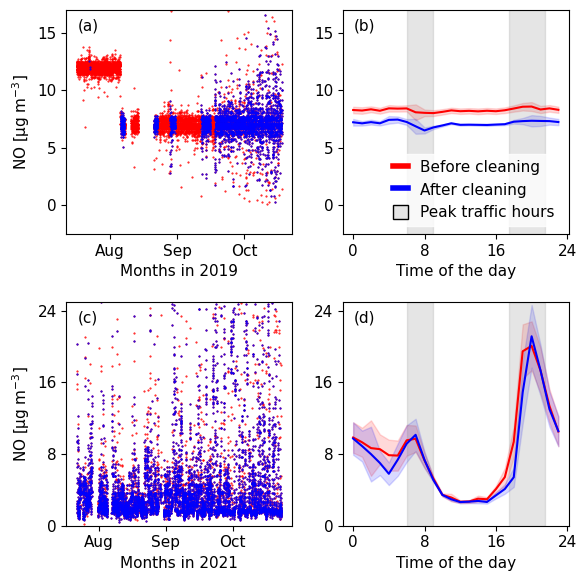

In [140]:
path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1541_Knowledge_Park_III_Greater_Noida_UPPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month >= 8)&(local_df['dates'].dt.month <11)]

fig, ax = plt.subplots(2,2, sharey=False,figsize=(6,6),gridspec_kw={'width_ratios': [3,3]})

pol = 'NO'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[0,0].scatter(local_df['dates'],local_df[pol], color = 'red', s =1,marker = '.')
ax[0,0].scatter(local_df['dates'],local_df[pol + '_outliers'], color = 'blue', s =1,marker = '.')
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0,0].set_ylabel("NO" + ' [µg m' + '$^{-3}$' + ']')
ax[0,0].set_xlabel("Months in 2019")
ax[0,0].set_ylim([0,60])
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))


get_diurnal(local_df, pol, 'red', 'title', ax[0,1])
get_diurnal(local_df, pol + '_outliers', 'blue', 'title', ax[0,1])
# get_diurnal(df, pol+'_outliers', 'b', 'title', ax[1])

# ax[0,1].get_legend().remove() 

ax[0,1].set_xlabel("Time of the day")


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1541_Knowledge_Park_III_Greater_Noida_UPPCB_2021.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month >= 8)&(local_df['dates'].dt.month <11)]

pol = 'NO'
# ax.scatter(local_df['dates'],local_df['NO2'], color = '#FF00FF', s =3)
ax[1,0].scatter(local_df['dates'],local_df[pol], color = 'red', s =1,marker = '.')
ax[1,0].scatter(local_df['dates'],local_df[pol + '_outliers'], color = 'blue', s =1,marker = '.')
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1,0].set_ylabel("NO" +' [µg m' + '$^{-3}$' + ']')
ax[1,0].set_xlabel("Months in 2021")
ax[1,0].set_ylim([15,70])



get_diurnal(local_df, pol, 'red', 'title', ax[1,1])
get_diurnal(local_df, pol + '_outliers', 'blue', 'title', ax[1,1])
# get_diurnal(df, pol+'_outliers', 'b', 'title', ax[1])

# ax[1,1].get_legend().remove() 

ax[1,1].set_xlabel("Time of the day")


ax[1,1].axvspan(6, 9, alpha=0.2, color='grey')

ax[1,1].axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')


ax[0,1].axvspan(6, 9, alpha=0.2, color='grey')

ax[0,1].axvspan(17.5, 21.5, alpha=0.2, color='grey', label = 'Peak traffic hours')

# ax[0,0].annotate(' [a]',(.1, .96),ha='left', va='top',size= 10) 
fig.tight_layout()

plt.text(.05, .96, '(a)', ha='left', va='top',transform=ax[0,0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(b)', ha='left', va='top',transform=ax[0,1].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(c)', ha='left', va='top',transform=ax[1,0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, '(d)', ha='left', va='top',transform=ax[1,1].transAxes,backgroundcolor = 'white')

# plt.text(.05, .96, '(b)', ha='left', va='top', transform=ax[1].transAxes,backgroundcolor = 'white')
# plt.text(.05, .96, '(a)', ha='left', va='top', transform=ax[0].transAxes,backgroundcolor = 'white')


ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(3))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(3))

ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(4))


ax[0,0].set_ylim([0,16])
ax[0,1].set_ylim([0,16])
ax[1,0].set_ylim([0,25])
ax[1,1].set_ylim([0,25])


custom_lines = [Line2D([0], [0], color='#ff0000', lw=4),
                Line2D([0], [0], color='#0000fd', lw=4),
                Patch(facecolor='#e5e5e5', edgecolor='black',label='Color Patch')]



legend = ax[0,1].legend(custom_lines, ['Before cleaning', 'After cleaning', 'Peak traffic hours'], loc='lower right')

frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
ax[0,0].set_ylim([-2.5,17])
ax[0,1].set_ylim([-2.5,17])

ax[0,0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[0,1].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,0].yaxis.set_major_locator(plt.MaxNLocator(4))
ax[1,1].yaxis.set_major_locator(plt.MaxNLocator(4))

fig.savefig('Figure_s11.png', dpi=1200, bbox_inches="tight")
plt.show()

### Figure S12

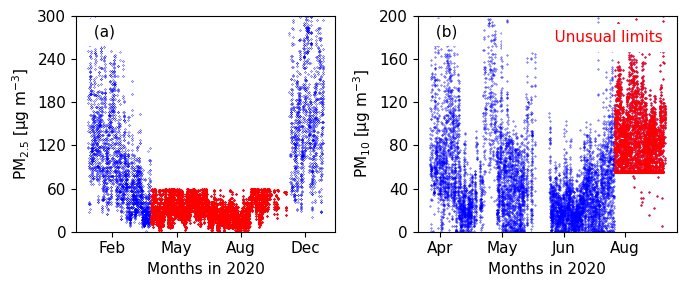

In [141]:
fig, ax = plt.subplots(1,2, sharey=False,figsize=(7,3),gridspec_kw={'width_ratios': [3,3]})

path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1421_Dr._Karni_Singh_Shooting_Range_Delhi_DPCC_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

ax[0].scatter(local_df['dates'],local_df['PM25'], color = 'blue', s =0.01)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0].set_ylabel("PM" + '$_{2.5}$'+ ' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[0].set_xlabel("Months in 2020", fontsize=11)


ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[0].yaxis.set_major_locator(plt.MaxNLocator(5))
ax[1].yaxis.set_major_locator(plt.MaxNLocator(5))

t = local_df.loc[local_df["dates"].between("2020-04-08", "2020-11-08")]
ax[0].scatter(t['dates'],t['PM25'], color = 'red', s =0.1)


path = (r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_1408_Talcher_Coalfields_Talcher_OSPCB_2020.csv")
local_df =  pd.read_csv(path)
local_df['dates']=pd.to_datetime(local_df['dates'], format="%Y-%m-%d %H:%M")

local_df = local_df[(local_df['dates'].dt.month > 3)&(local_df['dates'].dt.month <9)]

ax[1].scatter(local_df['dates'],local_df['PM10'], color = 'blue', s =0.1)


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1].set_ylabel("PM" + '$_{10}$'+ ' [µg m' + '$^{-3}$' + ']', fontsize=11)
ax[1].set_xlabel("Months in 2020", fontsize=11)
ax[1].set_ylim([-0,200])
ax[0].set_ylim([0,300])
fig.tight_layout()

legend = ax[1].legend([Line2D([0], [0], color='red', lw=0)], 
             ['    Unusual limits'],facecolor = 'white',labelcolor='linecolor', fontsize =11,
             loc='upper right',framealpha =1, fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')



t = local_df.loc[local_df["dates"].between("2020-07-30", "2020-09-01")]
ax[1].scatter(t['dates'],t['PM10'], color = 'red', s =0.3)
plt.text(.05, .96, ' (a)', ha='left', va='top',size= 11, transform=ax[0].transAxes,backgroundcolor = 'white')
plt.text(.05, .96, ' (b)', ha='left', va='top',size= 11, transform=ax[1].transAxes,backgroundcolor = 'white')

fig.savefig('Figure_s12.png', dpi=1200, bbox_inches="tight")


### Figure S14

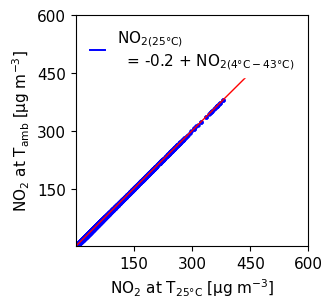

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, sharey=False,sharex=False,figsize=(3,3),gridspec_kw={'width_ratios': [2.5]})
fig_no = 10
axis_no = 8
label_no = 10
df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\After_Cleaning_New\site_119_Sirifort_Delhi_CPCB_2020.csv")
df1 = pd.read_csv(r"CPCB_Issues\data\site_119_Sirifort_Delhi_CPCB_15Min_2021.csv")
df1 = df1.rename({'Timestamp':'dates'}, axis=1)
df = pd.merge(df, df1[['dates','AT (°C)']], on = 'dates', how = 'left')
df = df.rename(columns = {'AT (°C)':'Temp'})
df['NOx'] =  pd.to_numeric(df.NOx, errors='coerce')
df['NO'] =  pd.to_numeric(df.NO, errors='coerce')
df['NO2'] =  pd.to_numeric(df.NO2, errors='coerce')
df['Temp'] =  pd.to_numeric(df.Temp, errors='coerce')
df['NO2_outliers'] = pd.to_numeric(df.NO2_outliers, errors='coerce')
df['NO_outliers'] = pd.to_numeric(df.NO_outliers, errors='coerce')
df['NOx_outliers'] =pd.to_numeric(df.NOx_outliers, errors='coerce') 
df=df.dropna(how='all')
df['NO2_const'] = 1/(22.414*(df['Temp']+273)/(273*46.0055))
df['NO_const'] = 1/(22.414*(df['Temp']+273)/(273*30.0061))
# df['NO2_const'] = 1.88
# df['NO_const'] = 1.23
# local_df = df.copy(deep =True)


df=df.dropna(how='all')
df['NO2_const'] = 1/(22.414*(df['Temp']+273)/(273*46.0055))
df['NO_const'] = 1/(22.414*(df['Temp']+273)/(273*30.0061))
df['NO_std_temp'] = df['NO_clean']
df['NO2_std_temp'] = df['NO2_clean']
df['NOx_std_temp'] = df['NOx_clean']

df['score'] = df['error'].apply(lambda x: 'blue' if x == 'C1' else 'red')
df.loc[df['score'] == 'red', 'NO_std_temp'] = df['NO_clean']*df['NO_const']
df.loc[df['score'] == 'red', 'NO2_std_temp'] = df['NO2_clean']*df['NO2_const']
df.loc[df['score'] == 'red', 'NOx_std_temp'] = df['NO2_clean'] + df['NO_clean']

df.loc[df['score'] == 'violet', 'NO_std_temp'] = df['NO_clean']*df['NO_const']
df.loc[df['score'] == 'violet', 'NO2_std_temp'] = df['NO2_clean']
df.loc[df['score'] == 'violet', 'NOx_std_temp'] = (df['NO2_clean']/df['NO2_const']) + (df['NO_clean'])


df.loc[df['score'] == 'blue', 'NO_std_temp'] = df['NO_clean']
df.loc[df['score'] == 'blue', 'NO2_std_temp'] = df['NO2_clean']
df.loc[df['score'] == 'blue', 'NOx_std_temp'] = (df['NOx_clean'])
df=df.dropna(how='all')
# sns.lmplot( x="NO2_std", y="NO2_std_temp", data=df, fit_reg=False)  
varx = df['NO2_CPCB']
vary = df['NO2_std_temp']
mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err = stats.linregress(varx[mask], vary[mask])

# g =sns.scatterplot(ax = ax, x="NO2_std", y="NO2_std_temp", df = df, c='blue')
ax.plot([1,500], [1,500], c='red', lw=1)
ax.scatter(df['NO2_CPCB'], df['NO2_std_temp'], c='blue', s =5)


ax.set_xlim([1,600])
ax.set_ylim([1,600])
ax.set_ylabel("NO" + '$_{2}$'+ ' at'+ " T" + '$_{amb} $' +' [µg $\mathregular{ m^{-3}}$]')
ax.set_xlabel("NO" + '$_{2}$'+ ' at'+ " T" + '$_{25 °C} $' +' [µg $\mathregular{ m^{-3}}$]')


legend = ax.legend([Line2D([0], [0], color='blue', lw=1.4)], 
             [("NO" + '$_{2  (25 °C)}$' + "\n""  = -0.2 + NO" + '$_{2  (4°C -43°C)}$')],facecolor = 'white',
                   labelcolor='black',
             loc='upper left',framealpha =1, fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')

ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
fig.savefig('Figure_s14.png', dpi=1200,bbox_inches="tight")


### Figure S16

C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1681255642.py:45: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1681255642.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1681255642.py:78: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
C:\Users\hitan\AppData\Local\Temp\ipykernel_2572\1681255642.py:100: UserWarning: FixedFormatter should only be used together w

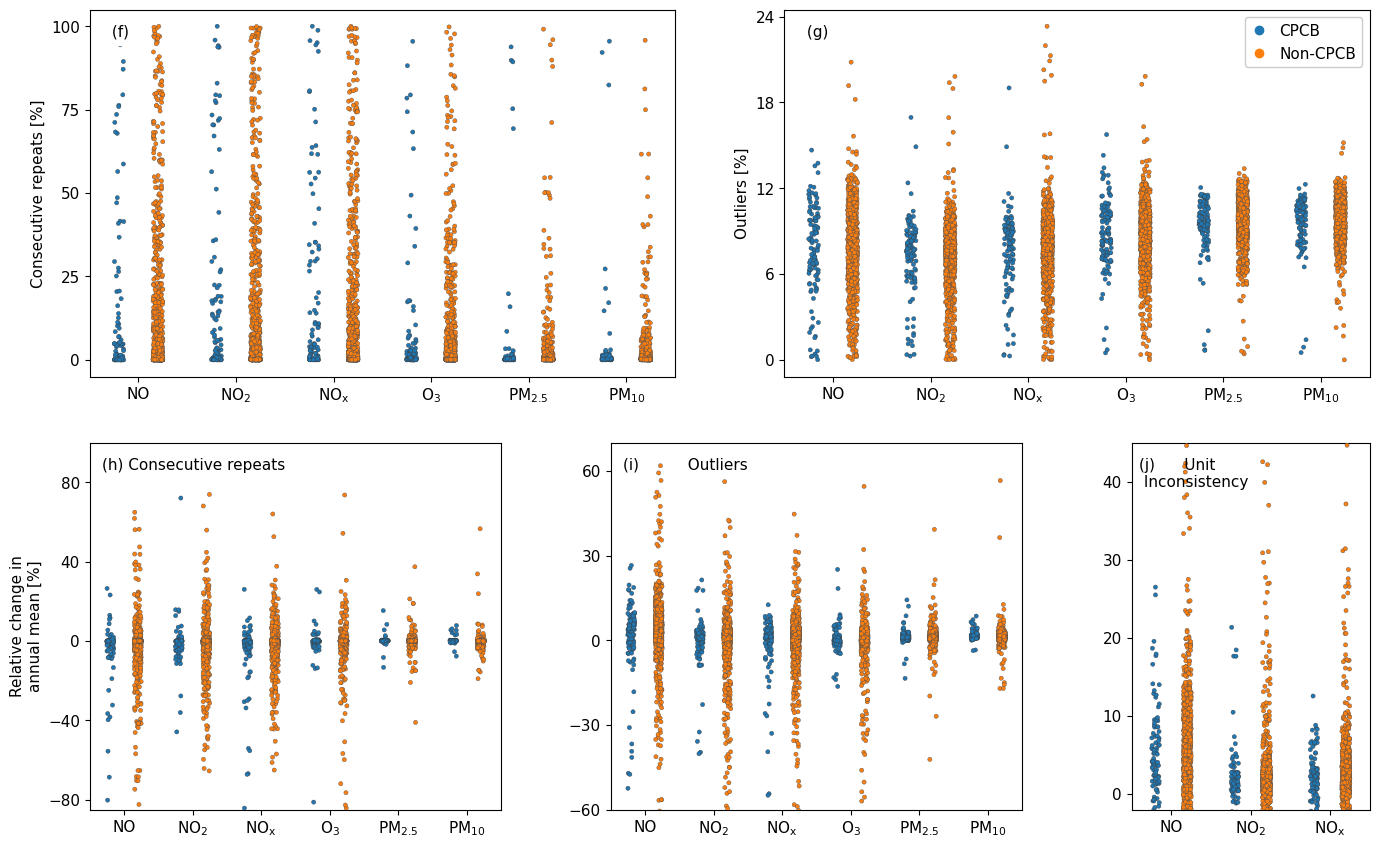

In [144]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(16,10))

gs = fig.add_gridspec(2,8)

ax1 = fig.add_subplot(gs[0:1, 0:4])
ax2 = fig.add_subplot(gs[0:1, 4:8])
ax3 = fig.add_subplot(gs[1:2, 0:3])
ax4 = fig.add_subplot(gs[1:2, 3:6])
ax5 = fig.add_subplot(gs[1:2, 6:8])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.7,
                    hspace=0.2)


sites_master = pd.read_csv(r"CPCB_Issues\AirPy_v2\sites_master.csv")
count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_count.csv")
count_var['org'] = pd.merge(count_var, sites_master, on='site_id', how='left')['org']
count_var['org'] = np.where(count_var['org'] == 'CPCB','CPCB','Non-CPCB')
t = count_var

lst = ['NO', 'NO2', 'NOx', 'Ozone',  'PM25', 'PM10']
for name in lst:
#     t = t[(t[name+'_clean'] != 0)]
    t.replace(0, np.nan, inplace=True)
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)
    t[name + '_consecutives'] = ((t[name] - consecutives_copy)/t[name])*100
    t[name + '_outliers'] = ((consecutives_copy - t[name+'_outliers'])/t[name])*100
#     if name[:2] == 'NO':
#         per_df[name + '_unit inconsistency'] =  (df[name + '_std']-df[name + '_outliers'])*100/df[name + '_outliers']
per_df = t


melt_df_1 = per_df.melt(id_vars=['org'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.stripplot(ax = ax1, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['org'],
            hue_order = ['CPCB','Non-CPCB'],
            dodge=True,s=3,linewidth=0.3
             )



plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


# ax1.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax1.yaxis.set_tick_params(labelbottom=True)
ax1.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax1.set_ylabel("Consecutive repeats [%]")
ax1.set_xlabel("Pollutants")
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
#ax1.set_ylim([-2, 50])



melt_df_1 = per_df.melt(id_vars=['org'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.stripplot(ax = ax2, 
            x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['org'],
            hue_order = ['CPCB','Non-CPCB'],
            dodge=True,s=3,linewidth=0.3
            )


plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax2.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax2.set_ylabel("Outliers [%]")
ax2.set_xlabel("Pollutants")
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))

#ax1.get_legend().remove()
#ax2.get_legend().remove()
# ax1.set_ylim([-2, 50])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=2.2,
                    hspace=0.3)


# fig.savefig('Figure_S_consecutive_and_outliers_2019_2021.png', dpi=1200, bbox_inches="tight")
#############


count_var = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
count_var['org'] = pd.merge(count_var, sites_master, on='site_id', how='left')['org']
count_var['org'] = np.where(count_var['org'] == 'CPCB', 'CPCB', 'Non-CPCB')
t = count_var
df = count_var


lst = ['NO', 'NO2', 'NOx', 'Ozone', 'PM25', 'PM10']
for name in lst:
    # t[name + '_consecutives'] = (t[name] - t[name+'_clean'])*100/t[name]
    # t[name + '_outliers'] = (t[name+'_outliers'] - t[name+'_clean'])*100/t[name+'_clean']
    consecutives_copy =  t[name + '_consecutives'].copy(deep=True)  
    t[name + '_consecutives'] = (t[name] - t[name + '_consecutives'])*100/t[name]
    t[name + '_outliers'] = (t[name] - t[name+'_outliers'])*100/t[name]

    if name[:2] == 'NO':
        per_df[name + '_Unit inconsistency'] =  (df[name]-df[name + '_outliers'])/df[name + '_outliers']*100
per_df = t

melt_df_1 = per_df.melt(id_vars=['org'], value_vars=[ 'NO_consecutives', 'NO2_consecutives', 
                                                            'NOx_consecutives', 'Ozone_consecutives','PM25_consecutives',
                                                            'PM10_consecutives'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.stripplot(ax = ax3, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['org'],
            hue_order = ['CPCB','Non-CPCB'],
            dodge=True,s=3,linewidth=0.3
            )


# plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax3.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax3.yaxis.set_tick_params(labelbottom=True)
ax3.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax3.set_ylabel("Relative change in " + "\n"+"annual mean [%]")
ax3.set_xlabel("Pollutants")
ax3.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax3.set_ylim([-2, 50])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)




melt_df_1 = per_df.melt(id_vars=['org'], value_vars=[ 'NO_outliers', 'NO2_outliers', 
                                                            'NOx_outliers', 'Ozone_outliers','PM25_outliers',
                                                            'PM10_outliers'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])


flierprops = dict(marker='o', markerfacecolor='red', markersize=3,  markeredgecolor='black')

sns.stripplot(ax = ax4, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['org'],
            hue_order = ['CPCB','Non-CPCB'],
            dodge=True,s=3,linewidth=0.3
            )


#plt.ylim(-2, 45)
# ax[0].set_ylim([-2,5])


ax4.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax4.yaxis.set_tick_params(labelbottom=True)
ax4.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$', "O" + '$_{3}$',"PM" + '$_{2.5}$',  "PM" + '$_{10}$'])
ax4.set_ylabel("Outliers [%]")
ax4.set_xlabel("Pollutants")
ax4.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax4.set_ylim([2, 25])
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)



from matplotlib.patches import Rectangle
# rectangle = plt.Rectangle((0,0), 50, 20, fc='blue',ec="red",axis = inset_ax1)

# ax[0].set_ylim([-2,60])

ax3.get_legend().remove()
ax4.get_legend().remove()

# ax3.set_ylim([-5,30])
# ax4.set_ylim([-15,35])



#================================


#========================
per_df = pd.read_csv(r"CPCB_Issues\AirPy_v2\new_data\summary\summary_mean.csv")
per_df['org'] = pd.merge(per_df, sites_master, on='site_id', how='left')['org']
per_df['org'] = np.where(per_df['org'] == 'CPCB', 'CPCB','Non-CPCB')
for name in ['NO', 'NO2', 'NOx']:
    per_df[name + '_Unit inconsistency'] =  (per_df[name] - per_df[name + '_outliers'])*100/per_df[name]
melt_df_1 = per_df.melt(id_vars=['org'], value_vars=[ 'NO_Unit inconsistency', 'NO2_Unit inconsistency', 
                                                            'NOx_Unit inconsistency'])
melt_df_1 [['Pollutant','Cleaning_method']] = pd.DataFrame(melt_df_1.variable.str.split('_',1).tolist(),
                                columns = ['Pollutant','Cleaning_method'])

sns.stripplot(ax = ax5, x = melt_df_1['Pollutant'],
            y = melt_df_1['value'],
            hue = melt_df_1['org'],
            hue_order = ['CPCB','Non-CPCB'],
            dodge=True,s=3,linewidth=0.3
            )




ax5.legend(title = "", loc='upper right',facecolor="white",framealpha=1)
# map(lambda axi: axi.set_axis_on(), ax.ravel())
ax5.yaxis.set_tick_params(labelbottom=True)
ax5.set_xticklabels(["NO","NO" + '$_{2}$', "NO" + '$_{x}$'])
ax5.set_ylabel("Outliers [%]")
ax5.set_xlabel("Pollutants")
ax5.yaxis.set_major_locator(plt.MaxNLocator(5))
# ax[0].legend(loc='upper right',framealpha =1, fancybox = False)


ax5.get_legend().remove()

ax3.set_ylabel("Relative change in annual mean [%]")
ax4.set_ylabel("")
ax5.set_ylabel("")


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.7,
                    hspace=0.18)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax5.set_xlabel("")
# fig.suptitle('(B) With outliers ', fontsize=14)

#ax1.set_ylim([-2, 105])
# ax2.set_ylim([-2, 60])
ax3.set_ylim([-85, 100])
ax4.set_ylim([-60, 70])
# ax5.set_ylim([-50, 150])
ax1.get_legend().remove()

plt.text(.03, .96, '(h) Consecutive repeats', ha='left', va='top', transform=ax3.transAxes,  backgroundcolor = 'none')
plt.text(.03, .96, '(i)          Outliers', ha='left', va='top',transform=ax4.transAxes, backgroundcolor = 'none')
plt.text(.03, .96, '(j)      Unit' + "\n" + ' Inconsistency', ha='left', va='top',transform=ax5.transAxes, backgroundcolor = 'none')
plt.text(.03, .96, ' (f)', ha='left', va='top', transform=ax1.transAxes, backgroundcolor = 'white')
plt.text(.03, .96, ' (g)', ha='left', va='top',transform=ax2.transAxes, backgroundcolor = 'white')

ax3.set_ylabel("Relative change in" + "\n"+"annual mean [%]")

fig.savefig('figure_s16.png', dpi=1200, bbox_inches="tight")

plt.show()